# **Supermarket Data Analysis**

-----------------------------

### **Background**
Merupakan suatu keharusan bagi setiap pelaku bisnis untuk mengetahui segmentasi pasar produknya. Pengetahuan yang baik terhadap produk sangat penting agar proses bisnis perusahaan dapat berjalan dengan baik. Salah satu cara untuk menganalisis segmentasi pasar adalah dengan mengetahui perilaku pelanggan dan kebutuhan pelanggan. Sehingga dengan menganalisis data Pelanggan Supermarket diharapkan dapat menjadi acuan bagi para pemangku kepentingan seperti kepala cabang supermarket dan tim pemasaran supermarket untuk membuat strategi pemasaran yang baik agar dapat meningkatkan penjualan produk dan juga mencapai tingkat kepuasan pelanggan yang tinggi. Hingga saat ini, out market yaitu Pasar Indonesia (IndoMarket) telah melakukan lima kampanye yang bertujuan untuk mendongkrak pendapatan penjualan. Pihak manajemen nampaknya belum puas dengan kampanye sebelumnya dan ingin memperbaiki strategi kampanye berikutnya.

### **Problem Statement**
Untuk meningkatkan efektivitas kampanye di masa depan, manajemen IndoMarket telah meminta analis data untuk mengevaluasi kinerja kampanye sebelumnya. Selain itu, perusahaan berupaya memahami segmentasi pelanggan dan mengidentifikasi area potensial untuk pertumbuhan dan pengembangan. Informasi ini akan berperan penting dalam merancang kampanye yang lebih strategis dan efektif di masa mendatang.

`Key Questions:`
1. Seberapa efektifkah kampanye sebelumnya dalam menarik pelanggan dan meningkatkan penjualan?
2. Wawasan apa yang dapat kita peroleh mengenai perilaku pembelian pelanggan berdasarkan informasi demografis mereka?
3. Area potensial apa yang dapat dikembangkan atau ditingkatkan untuk meningkatkan kampanye dan penjualan di masa depan?

### **Problem Limitation**

1. Menggunakan Data Supermarket dari tahun Juli 2012 sampai dengan Juni 2014
2. Menggunakan Data usia dari tahun terakhir pelanggan bergabung menjadi anggota supermarket
3. Produk Supermarket dibatasi pada jenis produk seperti Anggur, Buah-buahan, Produk Daging, Produk Ikan, Produk Manis, dan Produk Emas.
4. Kategori Pelanggan dibagi menjadi subkategori Age, Marital_Status, Education, Income, Kidhome, dan Teenhome.

### **Goals**
Tujuan utamanya adalah untuk mengevaluasi kampanye sebelumnya dan mendapatkan pemahaman yang lebih baik tentang preferensi pelanggan. Dari informasi tersebut, tim pemasaran dapat menyempurnakan strateginya sehingga membantu IndoMarket meningkatkan penjualan dan mengembangkan bisnis.

------------------------------
## **Data Understanding**

### **Dataset Source**
Data tersebut telah disediakan oleh Purwadhika untuk keperluan Capstone Project 2. 

### **Dataset Explanation**
Basis data `Supermarket Customers` terdiri dari 29 kolom. Kolom ini mencakup informasi tentang demografi pelanggan dan perilaku pembelian mereka. Perilaku ini meliputi jumlah produk yang dibeli dari setiap kategori, aktivitas pembelian terkait promosi, dan jumlah pembelian berdasarkan saluran belanja (website, katalog, dan di dalam toko). Data dikumpulkan antara Juli 2012 dan Juni 2014.

**`A. People`**
*	**ID**: Customer's unique identifier
*	**Year_Birth**: Customer's birth year
*	**Education**: Customer's education level
*	**Marital_Status**: Customer's marital status
*	**Income**: Customer's yearly household income
*	**Kidhome**: Number of children in customer's household
*	**Teenhome**: Number of teenagers in customer's household
*	**Dt_Customer**: Date of customer's enrollment with the company
*	**Recency**: Number of days since customer's last purchase
*	**Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

**`B. Products`**
*	**MntWines**: Amount spent on wine in last 2 years
*	**MntFruits**: Amount spent on fruits in last 2 years
*	**MntMeatProducts**: Amount spent on meat in last 2 years
*	**MntFishProducts**: Amount spent on fish in last 2 years
*	**MntSweetProducts**: Amount spent on sweets in last 2 years
*	**MntGoldProds**: Amount spent on gold in last 2 years

**`C. Promotion`**
*	**NumDealsPurchases**: Number of purchases made with a discount
*	**AcceptedCmp1**: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
*	**AcceptedCmp2**: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
*	**AcceptedCmp3**: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
*	**AcceptedCmp4**: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
*	**AcceptedCmp5**: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
*	**Response**: 1 if the customer accepted the offer in the last campaign, 0 otherwise

**`D. Place`**
*	**NumWebPurchases**: Number of purchases made through the company’s website
*	**NumCatalogPurchases**: Number of purchases made using a catalog
*	**NumStorePurchases**: Number of purchases made directly in stores
*	**NumWebVisitsMonth**: Number of visits to the company’s website in the last month


## **Data Analysis**

Setelah pembersihan data selesai, kami akan melakukan analisis untuk mengevaluasi kinerja kampanye IndoMarket sebelumnya. Selanjutnya kita juga akan mempelajari perilaku pelanggan berdasarkan karakteristik demografi. Terakhir, kami akan menjajaki potensi peluang yang dapat dimaksimalkan IndoMarket dalam merancang kampanye pemasaran selanjutnya.

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import missingno as msn
import math
from scipy.stats import normaltest
from category_encoders import OrdinalEncoder


import warnings
warnings.filterwarnings('ignore')

In [3]:
df_copy = pd.read_csv('data_cleaned.csv')
display(df_copy.head(), df_copy.tail())

,Unnamed: 0,Year_Birth,Education,Age,Age_Group,Income,IncomeClass,FamilySize,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,T_NPurchase,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,T_AcceptedCmpgn
0,0,1957,Undergraduate,57,Middle-aged,58138.0,Middle,1,2012-09-04,58,...,10,4,7,25,0,0,0,0,0,0
1,1,1954,Undergraduate,60,Old,46344.0,Lower Middle,3,2014-03-08,38,...,1,2,5,6,0,0,0,0,0,0
2,2,1965,Undergraduate,49,Middle-aged,71613.0,Middle,2,2013-08-21,26,...,2,10,4,21,0,0,0,0,0,0
3,3,1984,Undergraduate,30,Young Adults,26646.0,Poor,3,2014-02-10,26,...,0,4,6,8,0,0,0,0,0,0
4,4,1981,Postgraduate,33,Young Adults,58293.0,Middle,3,2014-01-19,94,...,3,6,5,19,0,0,0,0,0,0


,Unnamed: 0,Year_Birth,Education,Age,Age_Group,Income,IncomeClass,FamilySize,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,T_NPurchase,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,T_AcceptedCmpgn
2050,2233,1977,Undergraduate,37,Young Adults,666666.0,Rich,3,2013-06-02,23,...,1,3,6,11,0,0,0,0,0,0
2051,2235,1967,Undergraduate,47,Middle-aged,61223.0,Middle,3,2013-06-13,46,...,3,4,5,18,0,0,0,0,0,0
2052,2237,1981,Undergraduate,33,Young Adults,56981.0,Middle,1,2014-01-25,91,...,3,13,6,19,0,1,0,0,0,1
2053,2238,1956,Postgraduate,58,Middle-aged,69245.0,Middle,3,2014-01-24,8,...,5,10,3,23,0,0,0,0,0,0
2054,2239,1954,Postgraduate,60,Old,52869.0,Middle,4,2012-10-15,40,...,1,4,7,11,0,0,0,0,0,0


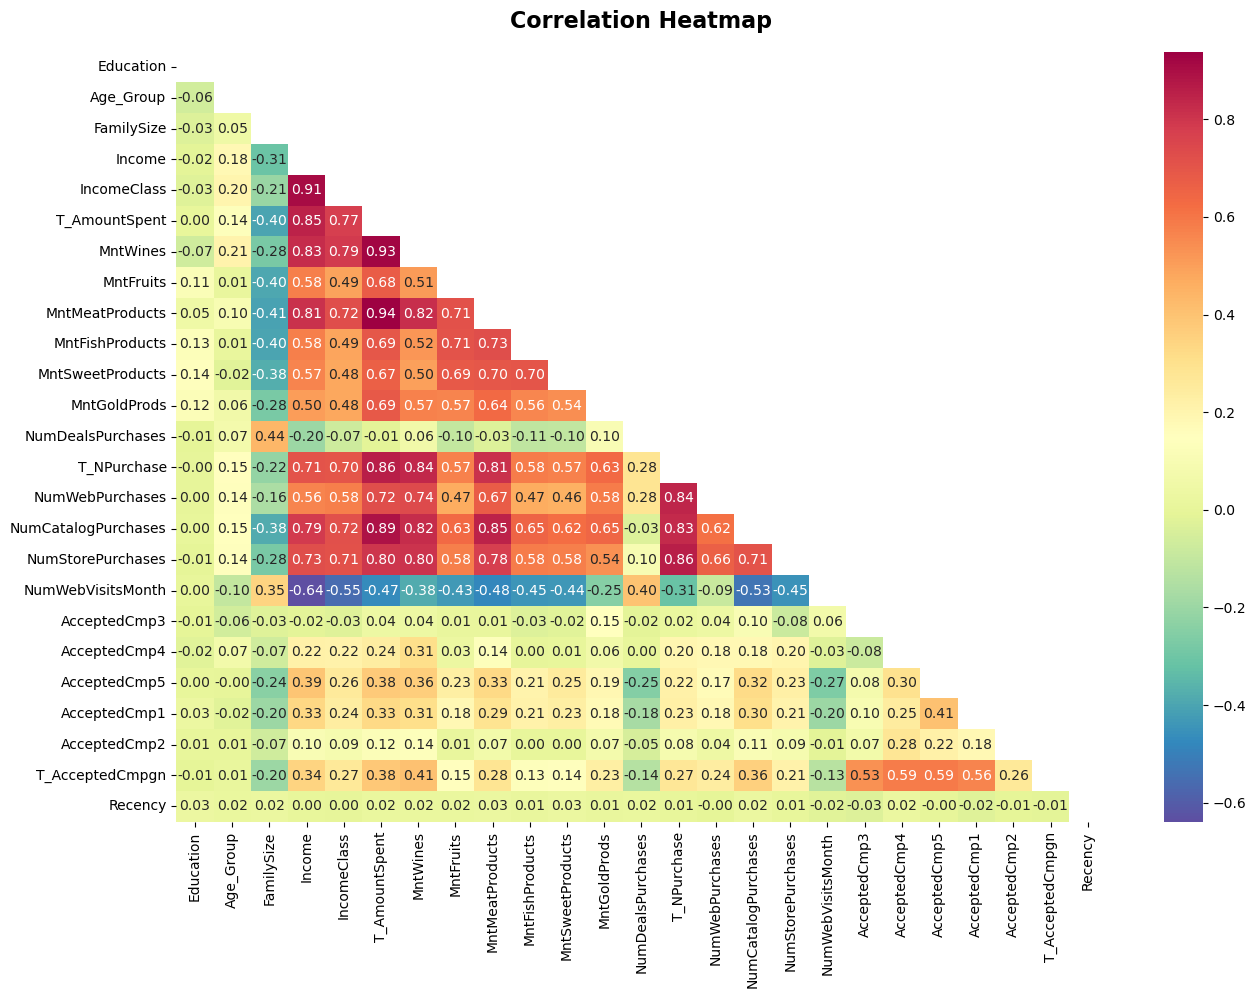

In [4]:
mappings = [
    {'col': 'Education',
    'mapping':{'Basic': 0, 'Undergraduate': 2, 'PostGraduate': 3}},
    {'col': 'Age_Group',
    'mapping':{'Young Adults': 0, 'Middle-aged': 1, 'Old': 2}},
    {'col': 'IncomeClass',
    'mapping':{'Poor': 0, 'Lower Middle': 1, 'Middle': 2, 'Upper Middle': 3, 'Rich': 4}}
]

ordinal_encoder = OrdinalEncoder(cols=['Education', 'Age_Group', 'IncomeClass'], mapping=mappings)
df_encoded = ordinal_encoder.fit_transform(df_copy)

df_encoded_1 = df_encoded[['Education', 'Age_Group', 'FamilySize', 'Income', 'IncomeClass', 'T_AmountSpent', 
                           'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
                           'MntGoldProds', 'NumDealsPurchases', 'T_NPurchase', 'NumWebPurchases','NumCatalogPurchases'
                           ,'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                            'AcceptedCmp1', 'AcceptedCmp2', 'T_AcceptedCmpgn', 'Recency']]

mask = np.triu(np.ones_like(df_encoded_1.corr(), dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(df_encoded_1.corr(method='spearman'), cmap='Spectral_r', annot=True, fmt='.2f', mask=mask)
plt.title('Correlation Heatmap', fontsize=16, y=1.02, fontweight='bold')
plt.show()

Sebelum melanjutkan ke analisis, kita akan memeriksa peta panas korelasi Spearman, yang memberikan ukuran kekuatan dan arah hubungan antara dua variabel.

Kita akan fokus pada korelasi antara data demografi, pembelian produk, jumlah pembelian dari masing-masing saluran, dan kampanye sebagai informasi awal yang dapat mendukung analisis kami. Berikut beberapa wawasannya:

**Age Group:**

Kelompok usia menunjukkan korelasi positif sedang dengan pembelian dan jumlah yang dibelanjakan. Seiring bertambahnya usia seseorang, tampaknya terdapat sedikit peningkatan baik dalam jumlah pembelian maupun total pengeluaran.

**Education:**

Tingkat pendidikan memiliki korelasi positif dengan jumlah total pengeluaran dan jumlah pembelian, sehingga menunjukkan bahwa tingkat pendidikan yang lebih tinggi sedikit mempengaruhi peningkatan pengeluaran dan frekuensi pembelian.

**Family Size:**

Jumlah anggota keluarga menunjukkan korelasi negatif sedang hingga kuat dengan jumlah pengeluaran untuk pembelian produk, yang menunjukkan bahwa keluarga yang lebih besar cenderung membelanjakan lebih sedikit secara keseluruhan. Selain itu, ukuran keluarga menunjukkan korelasi moderat dengan jumlah transaksi dan pembelian web, sehingga menunjukkan adanya hubungan yang khas.

**Income:**

Pendapatan menunjukkan korelasi yang kuat dengan berbagai faktor seperti jumlah total yang dibelanjakan, frekuensi pembelian, dan penerimaan kampanye. Pendapatan yang lebih tinggi berkorelasi dengan peningkatan pengeluaran, pembelian yang lebih sering, dan peluang penerimaan kampanye yang lebih besar.

**Campaigns:**

Penerimaan kampanye menunjukkan korelasi yang lemah hingga sedang dengan faktor-faktor seperti pendapatan, pembelian produk, dan frekuensi pembelian di berbagai saluran, sehingga menunjukkan adanya hubungan, meskipun tidak terlalu kuat.

**NumWebVisitsMonth:**

Jumlah kunjungan web per bulan menunjukkan korelasi positif sedang dengan jumlah anggota keluarga dan pembelian promo, yang menunjukkan keterlibatan online yang lebih nyata bagi keluarga besar dan mereka yang melakukan lebih banyak pembelian promo.



### **Calculating Median Absolute Deviation**

Sebagian besar data yang akan kita gunakan dalam analisis ini tidak mengikuti distribusi normal; oleh karena itu, kita akan menggunakan median sebagai ukuran tendensi sentral. Selain itu, kami akan menghitung Median Absolut Deviasi (MAD) untuk setiap kolom numerik untuk menilai variabilitas di sekitar median. Pendekatan ini memungkinkan kami memiliki pemahaman yang kuat dan akurat tentang distribusi dan variabilitas data kami.

In [5]:
numerical_data = df_copy.drop(columns=['FamilySize', 'Education', 'Age_Group', 'IncomeClass', 
                                   'Dt_Customer', 'Day_Joined', 'Month_Joined', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2'])

In [6]:
from scipy.stats import median_abs_deviation

mad_values = numerical_data.apply(median_abs_deviation, axis=0)
mad_df = mad_values.reset_index()
mad_df.columns = ['Column', 'MAD']
mad_df

,Column,MAD
0,Unnamed: 0,560.0
1,Year_Birth,9.0
2,Age,9.0
3,Income,16234.0
4,Recency,25.0
5,MntWines,165.0
6,MntFruits,8.0
7,MntMeatProducts,59.0
8,MntFishProducts,12.0
9,MntSweetProducts,8.0


### **`1. Seberapa efektifkah kampanye sebelumnya dalam menarik pelanggan dan meningkatkan penjualan?`**

#### **1a. Bagaimana kinerja kampanye sebelumnya dalam hal tingkat partisipasi?**

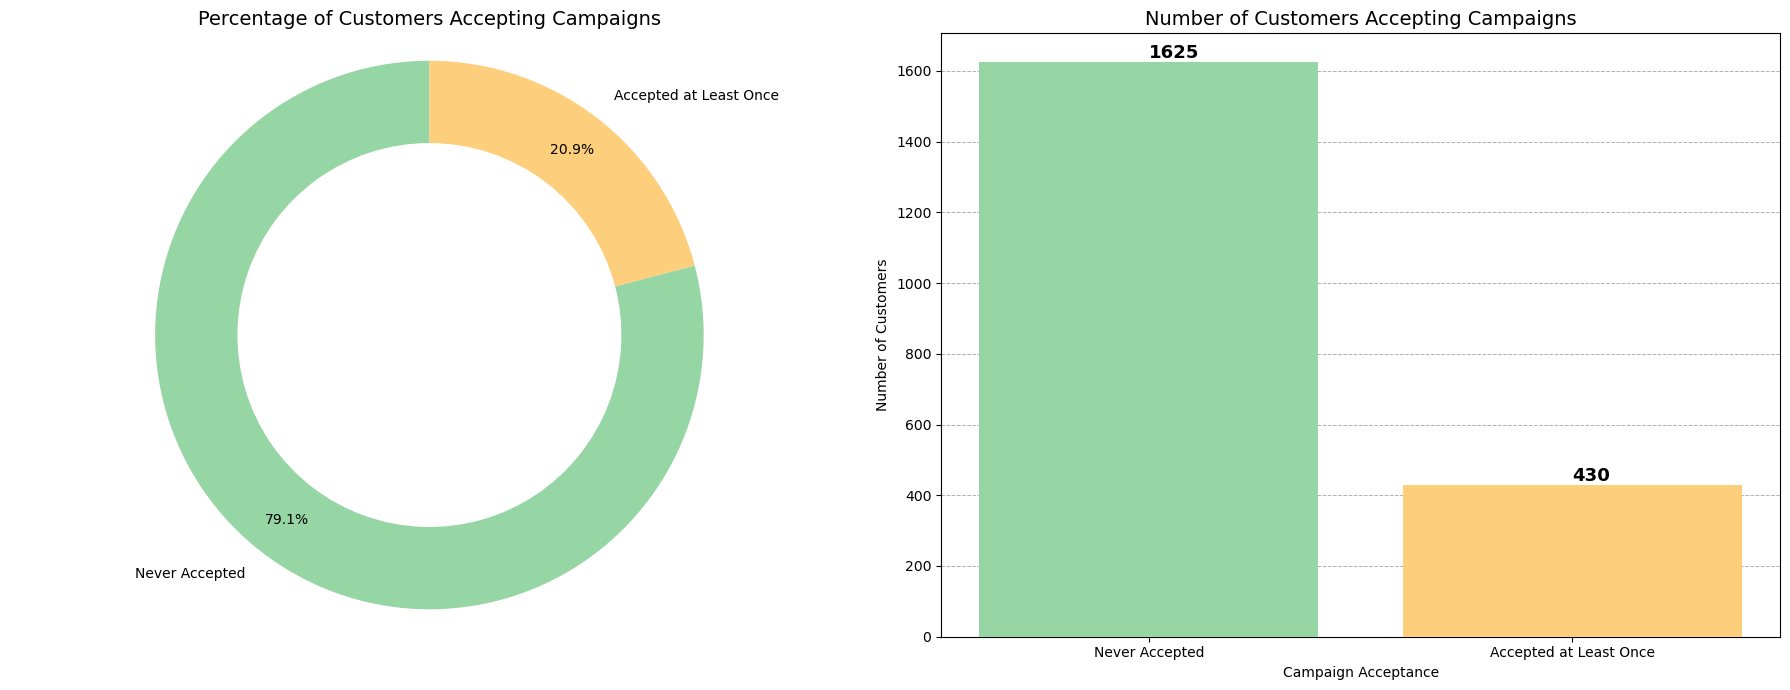

In [7]:

fig, axs = plt.subplots(1, 2, figsize=(18, 7))
never_accepted = (df_copy['T_AcceptedCmpgn'] == 0).sum()
accepted_at_least_once = (df_copy['T_AcceptedCmpgn'] > 0).sum()
labels = ['Never Accepted', 'Accepted at Least Once']
sizes = [never_accepted, accepted_at_least_once]
colors = ['#96d5a4', '#fdce7c']

# doughnut chart
axs[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.3))
axs[0].axis('equal')  
axs[0].set_title('Percentage of Customers Accepting Campaigns', fontsize=14)

# barplot
bars = axs[1].bar(labels, sizes, color=colors, zorder=3)
axs[1].set_title('Number of Customers Accepting Campaigns', fontsize=14)
axs[1].set_ylabel('Number of Customers')
axs[1].set_xlabel('Campaign Acceptance')

for bar in bars:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', fontsize=13, fontweight='bold')  # va: vertical alignment

axs[1].yaxis.grid(True, linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()


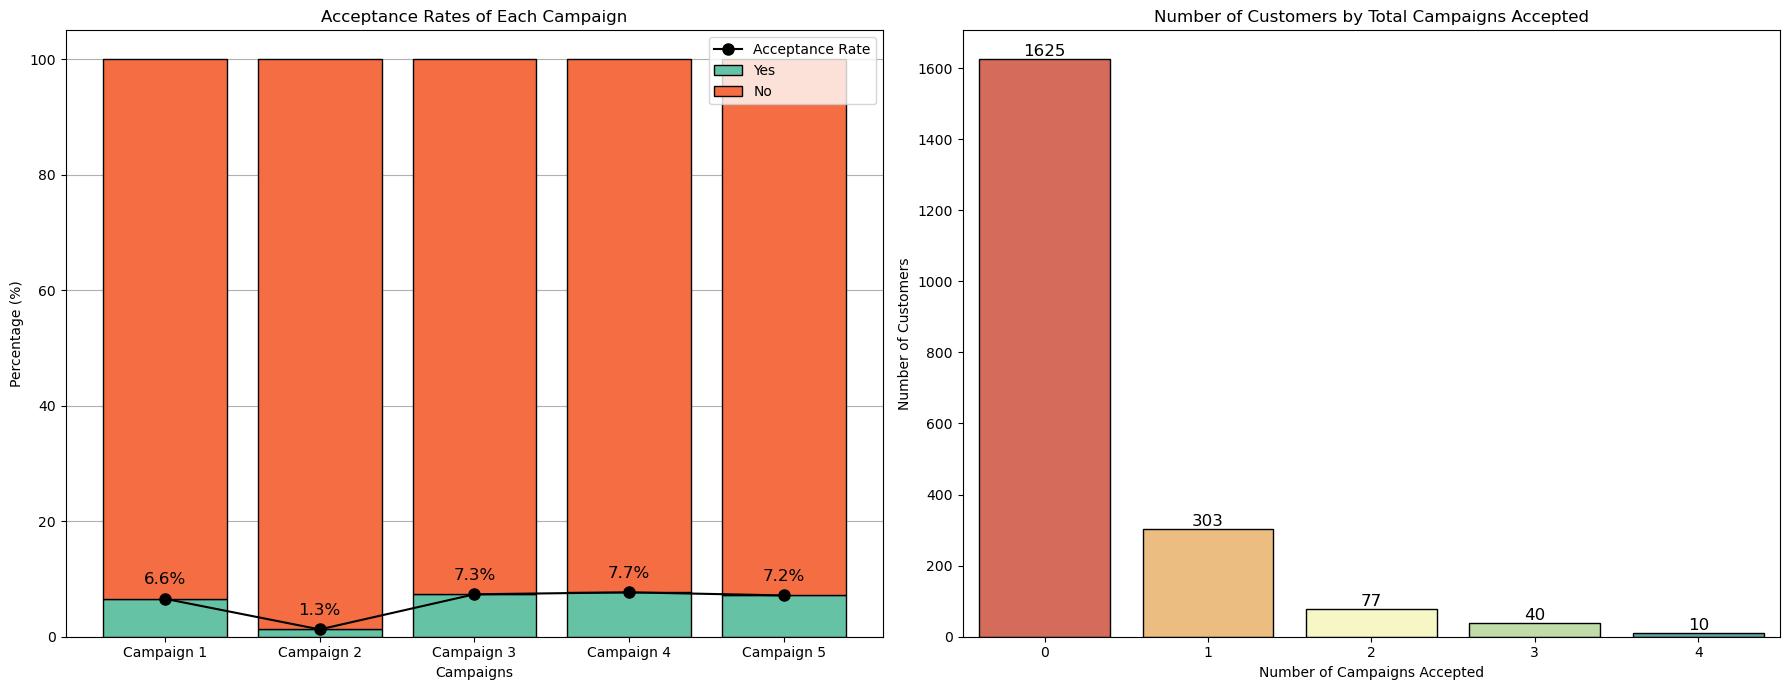

In [8]:

fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# first fraph
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
acceptance_rates = df_copy[campaign_columns].mean() * 100
rejection_rates = 100 - acceptance_rates
x = np.arange(len(campaign_columns))

axs[0].bar(x, acceptance_rates, color=sns.color_palette("Spectral_r", as_cmap=True)(0.2), label='Yes', edgecolor='black')
axs[0].bar(x, rejection_rates, bottom=acceptance_rates, color=sns.color_palette("Spectral_r", as_cmap=True)(0.8), label='No', edgecolor='black', zorder=2)
axs[0].plot(x, acceptance_rates, color='black', marker='o', linestyle='-', linewidth=1.5, markersize=8, label='Acceptance Rate')

for i, rate in enumerate(acceptance_rates):
    axs[0].text(i, rate+2, f"{rate:.1f}%", ha='center', va='bottom', fontsize=12, color='black')

axs[0].set_xticks(x)
axs[0].set_xticklabels([f"Campaign {i+1}" for i in range(len(campaign_columns))])
axs[0].set_xlabel('Campaigns')
axs[0].set_ylabel('Percentage (%)')
axs[0].set_title('Acceptance Rates of Each Campaign')
axs[0].legend()
axs[0].grid(True, axis='y')

# Second graph
acceptance_counts = df_copy['T_AcceptedCmpgn'].value_counts().sort_index()

bars = sns.barplot(x=acceptance_counts.index, y=acceptance_counts.values, palette='Spectral', edgecolor='black', ax=axs[1])

for bar in bars.patches:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12, color='black')
    
axs[1].set_title('Number of Customers by Total Campaigns Accepted')
axs[1].set_xlabel('Number of Campaigns Accepted')
axs[1].set_ylabel('Number of Customers')
axs[1].set_xticks(ticks=range(len(acceptance_counts.index)))
axs[1].set_xticklabels(acceptance_counts.index)

plt.tight_layout()
plt.show()


##### **Insight :**

- Mayoritas pelanggan belum terlibat dalam kampanye ini. 
- Dari 2055 pelanggan IndoMarket, hanya 430 orang, atau 20,9%, yang pernah menerima kampanye setidaknya satu kali. 79,1% tidak pernah menerima kampanye. 
- Grafik bertumpuk menunjukkan adanya penurunan partisipasi dari kampanye 1 ke kampanye 2. Namun, tingkat partisipasi tetap relatif stabil di kisaran 7,5% untuk kampanye 3, 4, dan 5.
- Dari lima kampanye, tingkat partisipasi terendah adalah 1,3% dan tertinggi adalah 7,7%.
- Tingkat penerimaan untuk setiap kampanye di bawah 10%. Angka ini relatif rendah, menunjukkan bahwa dari segi tingkat partisipasi, kampanye-kampanye sebelumnya kurang berhasil.

#### **1b. Apakah ada hubungan antara kampanye dan frekuensi transaksi?**

Berikut adalah plot biola yang menggambarkan perbedaan jumlah total pengeluaran antara individu yang menerima dan yang tidak menerima tawaran kampanye. Lebar biola pada tingkat pengeluaran yang berbeda menunjukkan kepadatan pelanggan. Bagian biola yang lebih luas menunjukkan lebih banyak pelanggan yang menghabiskan jumlah tersebut.

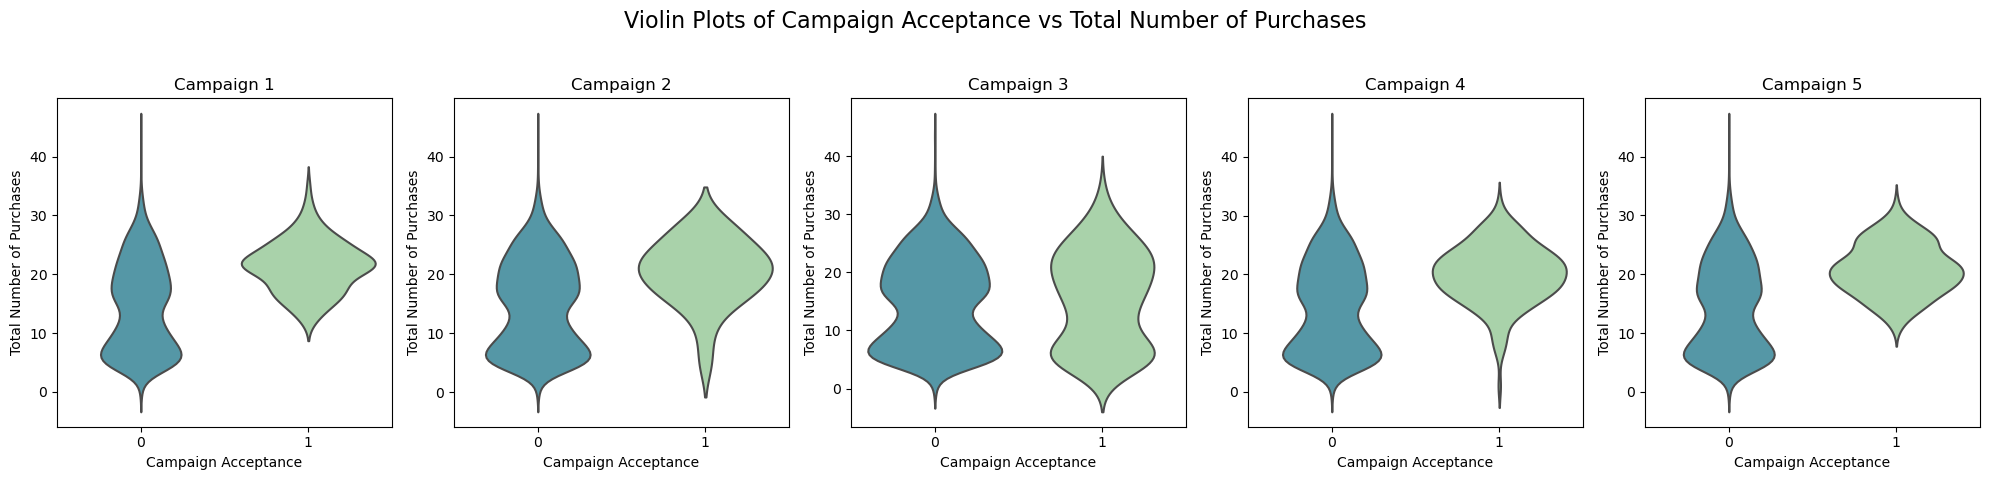

In [9]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Violin Plots of Campaign Acceptance vs Total Number of Purchases', fontsize=16)

sns.set_palette("Spectral_r")
for i, column in enumerate(campaign_columns):
    sns.violinplot(x=column, y='T_NPurchase', data=df_copy, ax=axs[i], inner=None)
    axs[i].set_title(f"Campaign {i+1}")
    axs[i].set_xlabel('Campaign Acceptance')
    axs[i].set_ylabel('Total Number of Purchases')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusting the layout to make sure everything fits without overlapping
plt.show()


Setelah meninjau peta panas korelasi di atas, terlihat jelas bahwa penerimaan kampanye berkorelasi dengan frekuensi pembelian dan volume transaksi, dengan nilai korelasi yang bervariasi untuk setiap kampanye.

Selanjutnya, kami mengamati perbandingan nilai median dari total transaksi dan volume transaksi antara pelanggan yang menerima kampanye dan yang tidak. Perbandingan ini memungkinkan kami mengevaluasi efektivitas relatif dan dampak kampanye terhadap perilaku pembelian pelanggan.

In [10]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
table = pd.DataFrame(columns=campaign_columns, index=['Yes', 'No'])

# Filling the table with the total amount spent
for column in campaign_columns:
    table.loc['Yes', column] = df_copy[df_copy[column] == 1]['T_NPurchase'].median()
    table.loc['No', column] = df_copy[df_copy[column] == 0]['T_NPurchase'].median()

table

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Yes,21.0,21.0,16.0,20.0,21.0
No,14.0,15.0,15.0,14.0,14.0


Kami akan melakukan uji hipotesis untuk mengetahui apakah populasi yang menerima kampanye sama dengan populasi yang tidak menerima kampanye. Tes ini akan memungkinkan kita untuk mengevaluasi dampak kampanye terhadap masyarakat.

Uji hipotesis yang akan kita gunakan adalah uji Mann-Whitney U yang dikenal juga dengan uji Wilcoxon rank-sum. Uji ini digunakan untuk membandingkan dua populasi nonparametrik yang independen. Hal ini akan membantu kami memahami apakah terdapat perbedaan signifikan dalam jumlah total pembelian antara kedua kelompok, sehingga memberikan wawasan mengenai efektivitas kampanye.

Hipotesisnya adalah sebagai berikut:

 - **Hipotesis Nol (H0)**: Median jumlah total pembelian sama atau lebih rendah bagi mereka yang menerima kampanye dibandingkan dengan mereka yang tidak.

- **Hipotesis Alternatif (H1)** : Median jumlah total pembelian lebih tinggi pada mereka yang menerima kampanye dibandingkan dengan mereka yang tidak.

In [11]:
from scipy.stats import mannwhitneyu
p_value_table = pd.DataFrame(columns=campaign_columns, index=['p-value'])

for column in campaign_columns:
    accepted = df_copy[df_copy[column] == 1]['T_NPurchase']
    not_accepted = df_copy[df_copy[column] == 0]['T_NPurchase']
    
    _, p_value = mannwhitneyu(accepted, not_accepted, alternative='greater')
    
    p_value_table.loc['p-value', column] = p_value

p_value_table 

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
p-value,0.0,0.000092,0.226057,0.0,0.0


Dari hasil pengujian kami menemukan bahwa:

- **Cmp1 yang Diterima,Cmp4 yang Diterima,Cmp5 yang Diterima:**
    Nilai p adalah 0, menunjukkan bukti kuat yang menentang hipotesis nol. Kami menyimpulkan bahwa terdapat cukup bukti pendukung yang menyatakan bahwa pelanggan yang menerima penawaran dalam kampanye ini memiliki median jumlah total pembelian yang jauh lebih tinggi dibandingkan pelanggan yang tidak menerima penawaran.

- **Cmp2 yang Diterima:**
    Nilai p-nya adalah 0,000092, lebih kecil dari tingkat alfa umum yaitu 0,05. Hal ini juga membuat kita menolak hipotesis nol. Kita dapat menyimpulkan bahwa terdapat cukup bukti yang menunjukkan bahwa kelompok yang menerima tawaran kampanye memiliki median jumlah total pembelian yang lebih tinggi.

- **Cmp3 yang Diterima:**
    Nilai p-nya adalah 0,226057, lebih besar dari 0,05. Dalam kasus ini, kami gagal menolak hipotesis nol, yang menyatakan bahwa mungkin tidak ada perbedaan yang signifikan dalam median jumlah total pembelian antara pelanggan yang menerima dan pelanggan yang tidak menerima penawaran dalam kampanye ini.

##### **Insight:**

- Dari pengujian hipotesis dan plot biola, terlihat jelas bahwa hubungan antara kampanye dan frekuensi transaksi bervariasi di berbagai kampanye. Variasi ini mungkin disebabkan oleh perbedaan strategi yang digunakan dalam setiap kampanye.

- Melalui pengujian hipotesis, kami menemukan cukup bukti yang menunjukkan bahwa kelompok yang menerima tawaran dari kampanye AcceptedCmp1, AcceptedCmp4, AcceptedCmp5, dan AcceptedCmp2 memiliki median jumlah total pembelian yang lebih tinggi. Sebaliknya, hubungan antara AcceptedCmp3 dan median jumlah total pembelian tidak signifikan, yang menunjukkan tidak ada dampak besar kampanye ini terhadap perilaku pembelian.

#### **1c. Apakah ada hubungan antara kampanye dan jumlah yang dibelanjakan?**

Mari kita periksa plot biola di bawah ini. Dari visualisasi tersebut terlihat bahwa kelompok yang menerima kampanye pada AcceptedCmp1, AcceptedCmp4, AcceptedCmp5, dan AcceptedCmp2 memiliki bagian atas plot yang lebih lebar dibandingkan dengan kelompok yang tidak menerima kampanye. Hal ini menunjukkan bahwa mereka yang menerima penawaran dalam kampanye ini cenderung memiliki nilai distribusi yang lebih tinggi, yang kemungkinan menunjukkan jumlah total pembelian atau jumlah pembelanjaan yang lebih besar.

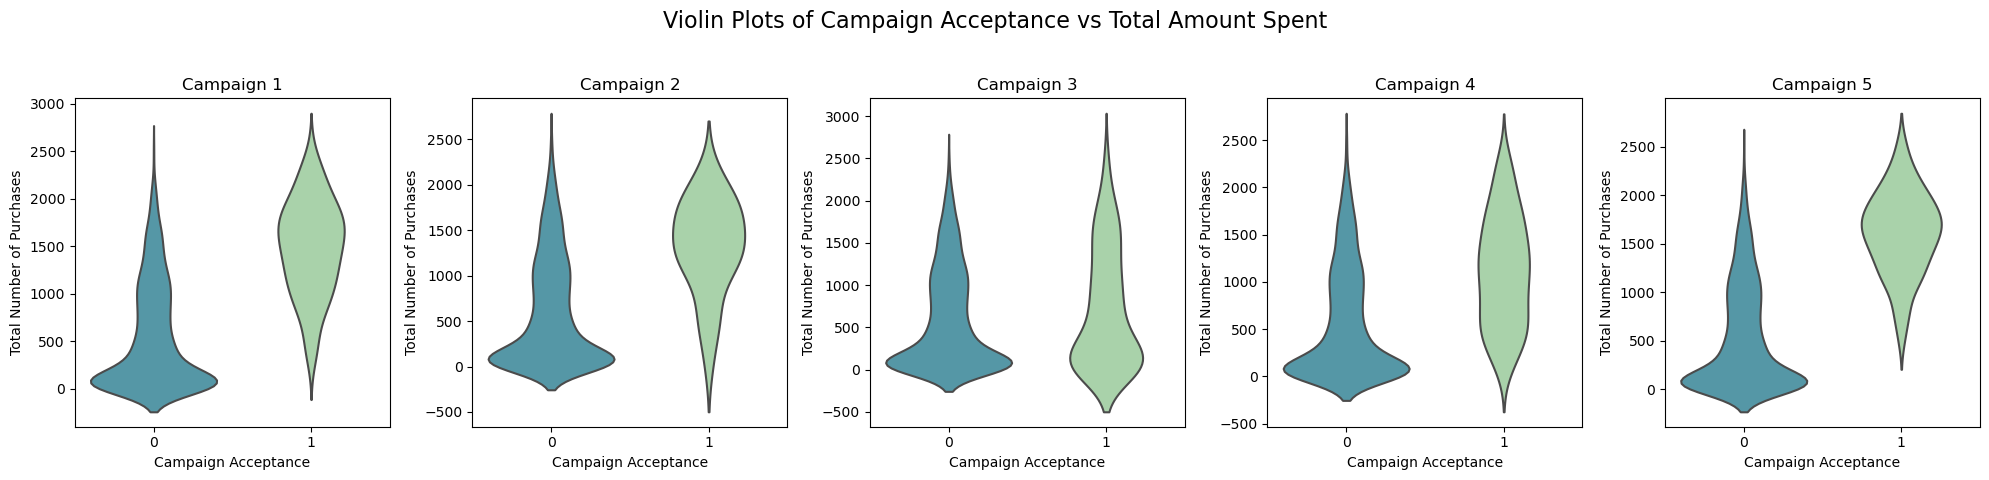

In [12]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Violin Plots of Campaign Acceptance vs Total Amount Spent', fontsize=16)

# Creating violin plots for each campaign
for i, column in enumerate(campaign_columns):
    sns.violinplot(x=column, y='T_AmountSpent', data=df_copy, ax=axs[i], inner=None)
    axs[i].set_title(f"Campaign {i+1}")
    axs[i].set_xlabel('Campaign Acceptance')
    axs[i].set_ylabel('Total Number of Purchases')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusting the layout to make sure everything fits without overlapping
plt.show()

Untuk melihat hubungan antara kampanye dan volume transaksi, kami juga akan melakukan pengujian hipotesis menggunakan Mann-Whitney. Pengujian akan dilakukan dengan hipotesis alternatif "lebih besar", yang berarti kami menguji apakah median T_AmountSpent lebih tinggi untuk pelanggan yang menerima penawaran kampanye.

In [13]:
for column in campaign_columns:
    table.loc['Yes', column] = df_copy[df_copy[column] == 1]['T_AmountSpent'].median()
    table.loc['No', column] = df_copy[df_copy[column] == 0]['T_AmountSpent'].median()

table

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Yes,1515.0,1375.0,488.0,1101.0,1672.0
No,316.5,385.0,393.0,317.0,312.0


Untuk pengujian ini, hipotesisnya adalah sebagai berikut:

 - **Hipotesis Nol (H0)**: Median jumlah total yang dibelanjakan adalah sama atau lebih rendah bagi mereka yang menerima kampanye dibandingkan dengan mereka yang tidak.

- **Hipotesis Alternatif (H1)** : Median jumlah total pembelanjaan lebih tinggi bagi mereka yang menerima kampanye dibandingkan dengan mereka yang tidak.

In [14]:
p_value_table = pd.DataFrame(columns=campaign_columns, index=['p-value'])

for column in campaign_columns:
    accepted = df_copy[df_copy[column] == 1]['T_AmountSpent']
    not_accepted = df_copy[df_copy[column] == 0]['T_AmountSpent']
    
    _, p_value = mannwhitneyu(accepted, not_accepted, alternative='greater')
    
    p_value_table.loc['p-value', column] = p_value

p_value_table 

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
p-value,0.0,0.0,0.040309,0.0,0.0


Interpretasi dari hasil ini adalah sebagai berikut:

- **Cmp1 Diterima,Cmp2 Diterima,Cmp4 Diterima,Cmp5 Diterima:** 
    Nilai p adalah 0, sangat menyarankan agar kita menolak hipotesis nol. Hal ini menunjukkan bahwa pelanggan yang menerima penawaran dalam kampanye ini memiliki median T_AmountSpent yang jauh lebih tinggi dibandingkan dengan pelanggan yang tidak menerima penawaran.

- **Cmp3 yang Diterima:** 
    Nilai p-nya adalah 0,040309, sedikit di bawah tingkat alfa umum yaitu 0,05. Hal ini menunjukkan bahwa ada beberapa bukti yang menolak hipotesis nol, yang menunjukkan median T_AmountSpent lebih tinggi di antara pelanggan yang menerima penawaran dalam kampanye ini, namun buktinya tidak sekuat kampanye lainnya.

##### **Insight :**

- Terdapat bukti kuat yang menunjukkan bahwa kelompok yang menerima tawaran dari kampanye AcceptedCmp1, AcceptedCmp4, AcceptedCmp5, dan AcceptedCmp2 cenderung memiliki median total jumlah pembelanjaan yang lebih tinggi. Sebaliknya, hubungan antara penerimaan penawaran di AcceptedCmp3 dan median jumlah pembelanjaan tidak signifikan.

- Temuan pengujian menunjukkan bahwa partisipasi dalam kampanye AcceptedCmp1, AcceptedCmp4, AcceptedCmp5, dan AcceptedCmp2 dikaitkan dengan pengeluaran pelanggan yang lebih tinggi, sedangkan partisipasi dalam AcceptedCmp3 tidak menunjukkan dampak signifikan terhadap total belanja pelanggan.

#### **1d. Apakah ada hubungan antara kampanye dan penjualan produk?**

Kami akan melakukan uji hipotesis untuk memahami hubungan antara setiap kampanye dan penjualan produk. 

Untuk pengujian ini, hipotesisnya adalah sebagai berikut:

 - **Hipotesis Nol (H0)**: Jumlah total rata-rata yang dibelanjakan untuk masing-masing produk adalah sama atau lebih rendah bagi mereka yang menerima kampanye dibandingkan dengan mereka yang tidak.

- **Hipotesis Alternatif (H1)** : Jumlah total rata-rata yang dibelanjakan untuk masing-masing produk lebih tinggi bagi mereka yang menerima kampanye dibandingkan dengan mereka yang tidak.

In [15]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
product_columns = [col for col in df_copy.columns if 'Mnt' in col]

p_values_products = pd.DataFrame(index=product_columns, columns=campaign_columns)

for product in product_columns:
    for campaign in campaign_columns:
        accepted = df_copy[df_copy[campaign] == 1][product]
        not_accepted = df_copy[df_copy[campaign] == 0][product]
        _, p_value = mannwhitneyu(accepted, not_accepted, alternative='greater')
        p_values_products.loc[product, campaign] = p_value

p_values_products

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
MntWines,0.0,0.0,0.049307,0.0,0.0
MntFruits,0.0,0.326285,0.292898,0.104873,0.0
MntMeatProducts,0.0,0.000866,0.329349,0.0,0.0
MntFishProducts,0.0,0.438221,0.923498,0.492741,0.0
MntSweetProducts,0.0,0.452629,0.842023,0.407174,0.0
MntGoldProds,0.0,0.000427,0.0,0.002232,0.0


Penafsirannya sebagai berikut:

**Jika nilai p rendah (≤ 0,05):**
Artinya, terdapat perbedaan signifikan dalam pembelanjaan pada masing-masing produk antara pelanggan yang berpartisipasi dalam kampanye dan yang tidak. Dalam hal ini, kampanye dikaitkan dengan perubahan pembelanjaan pada produk tersebut.

**Jika nilai p tinggi (> 0,05):**
Hal ini menunjukkan bahwa tidak ada perbedaan yang signifikan dalam pembelanjaan pada produk tersebut antara pelanggan yang berpartisipasi dan tidak berpartisipasi dalam kampanye. Di sini, kampanye tidak dikaitkan dengan perubahan signifikan dalam pembelanjaan produk.

Mari kita uraikan untuk setiap kampanye.
- **AcceptedCmp1** : Semua produk menunjukkan nilai p 0,0, yang menunjukkan hubungan signifikan antara kampanye dan pembelanjaan pada produk tersebut.
- **AcceptedCmp2** : **MntWines** dan **MntGoldProds** menunjukkan nilai di bawah 0,05, yang menunjukkan hubungan signifikan antara kampanye dan pembelanjaan produk ini. 
- **Cmp3 Diterima** : 
    **MntWines** dan **MntGoldProds** menunjukkan nilai di bawah 0,05, yang menunjukkan hubungan signifikan antara kampanye dan pembelanjaan produk tersebut. 
- **Cmp4 Diterima** : 
    **MntWines**, **MntGoldProds**, dan **MntMeatProducts** menunjukkan nilai di bawah 0,05, yang menunjukkan hubungan signifikan antara kampanye dan pembelanjaan produk-produk ini. 
- **Cmp5 Diterima** : 
    Semua produk menunjukkan nilai p sebesar 0,0, yang menunjukkan hubungan signifikan antara kampanye dan pembelanjaan pada produk tersebut.

Hasil pengujian hipotesis ini juga diperkuat dengan visualisasi boxplot berikut.

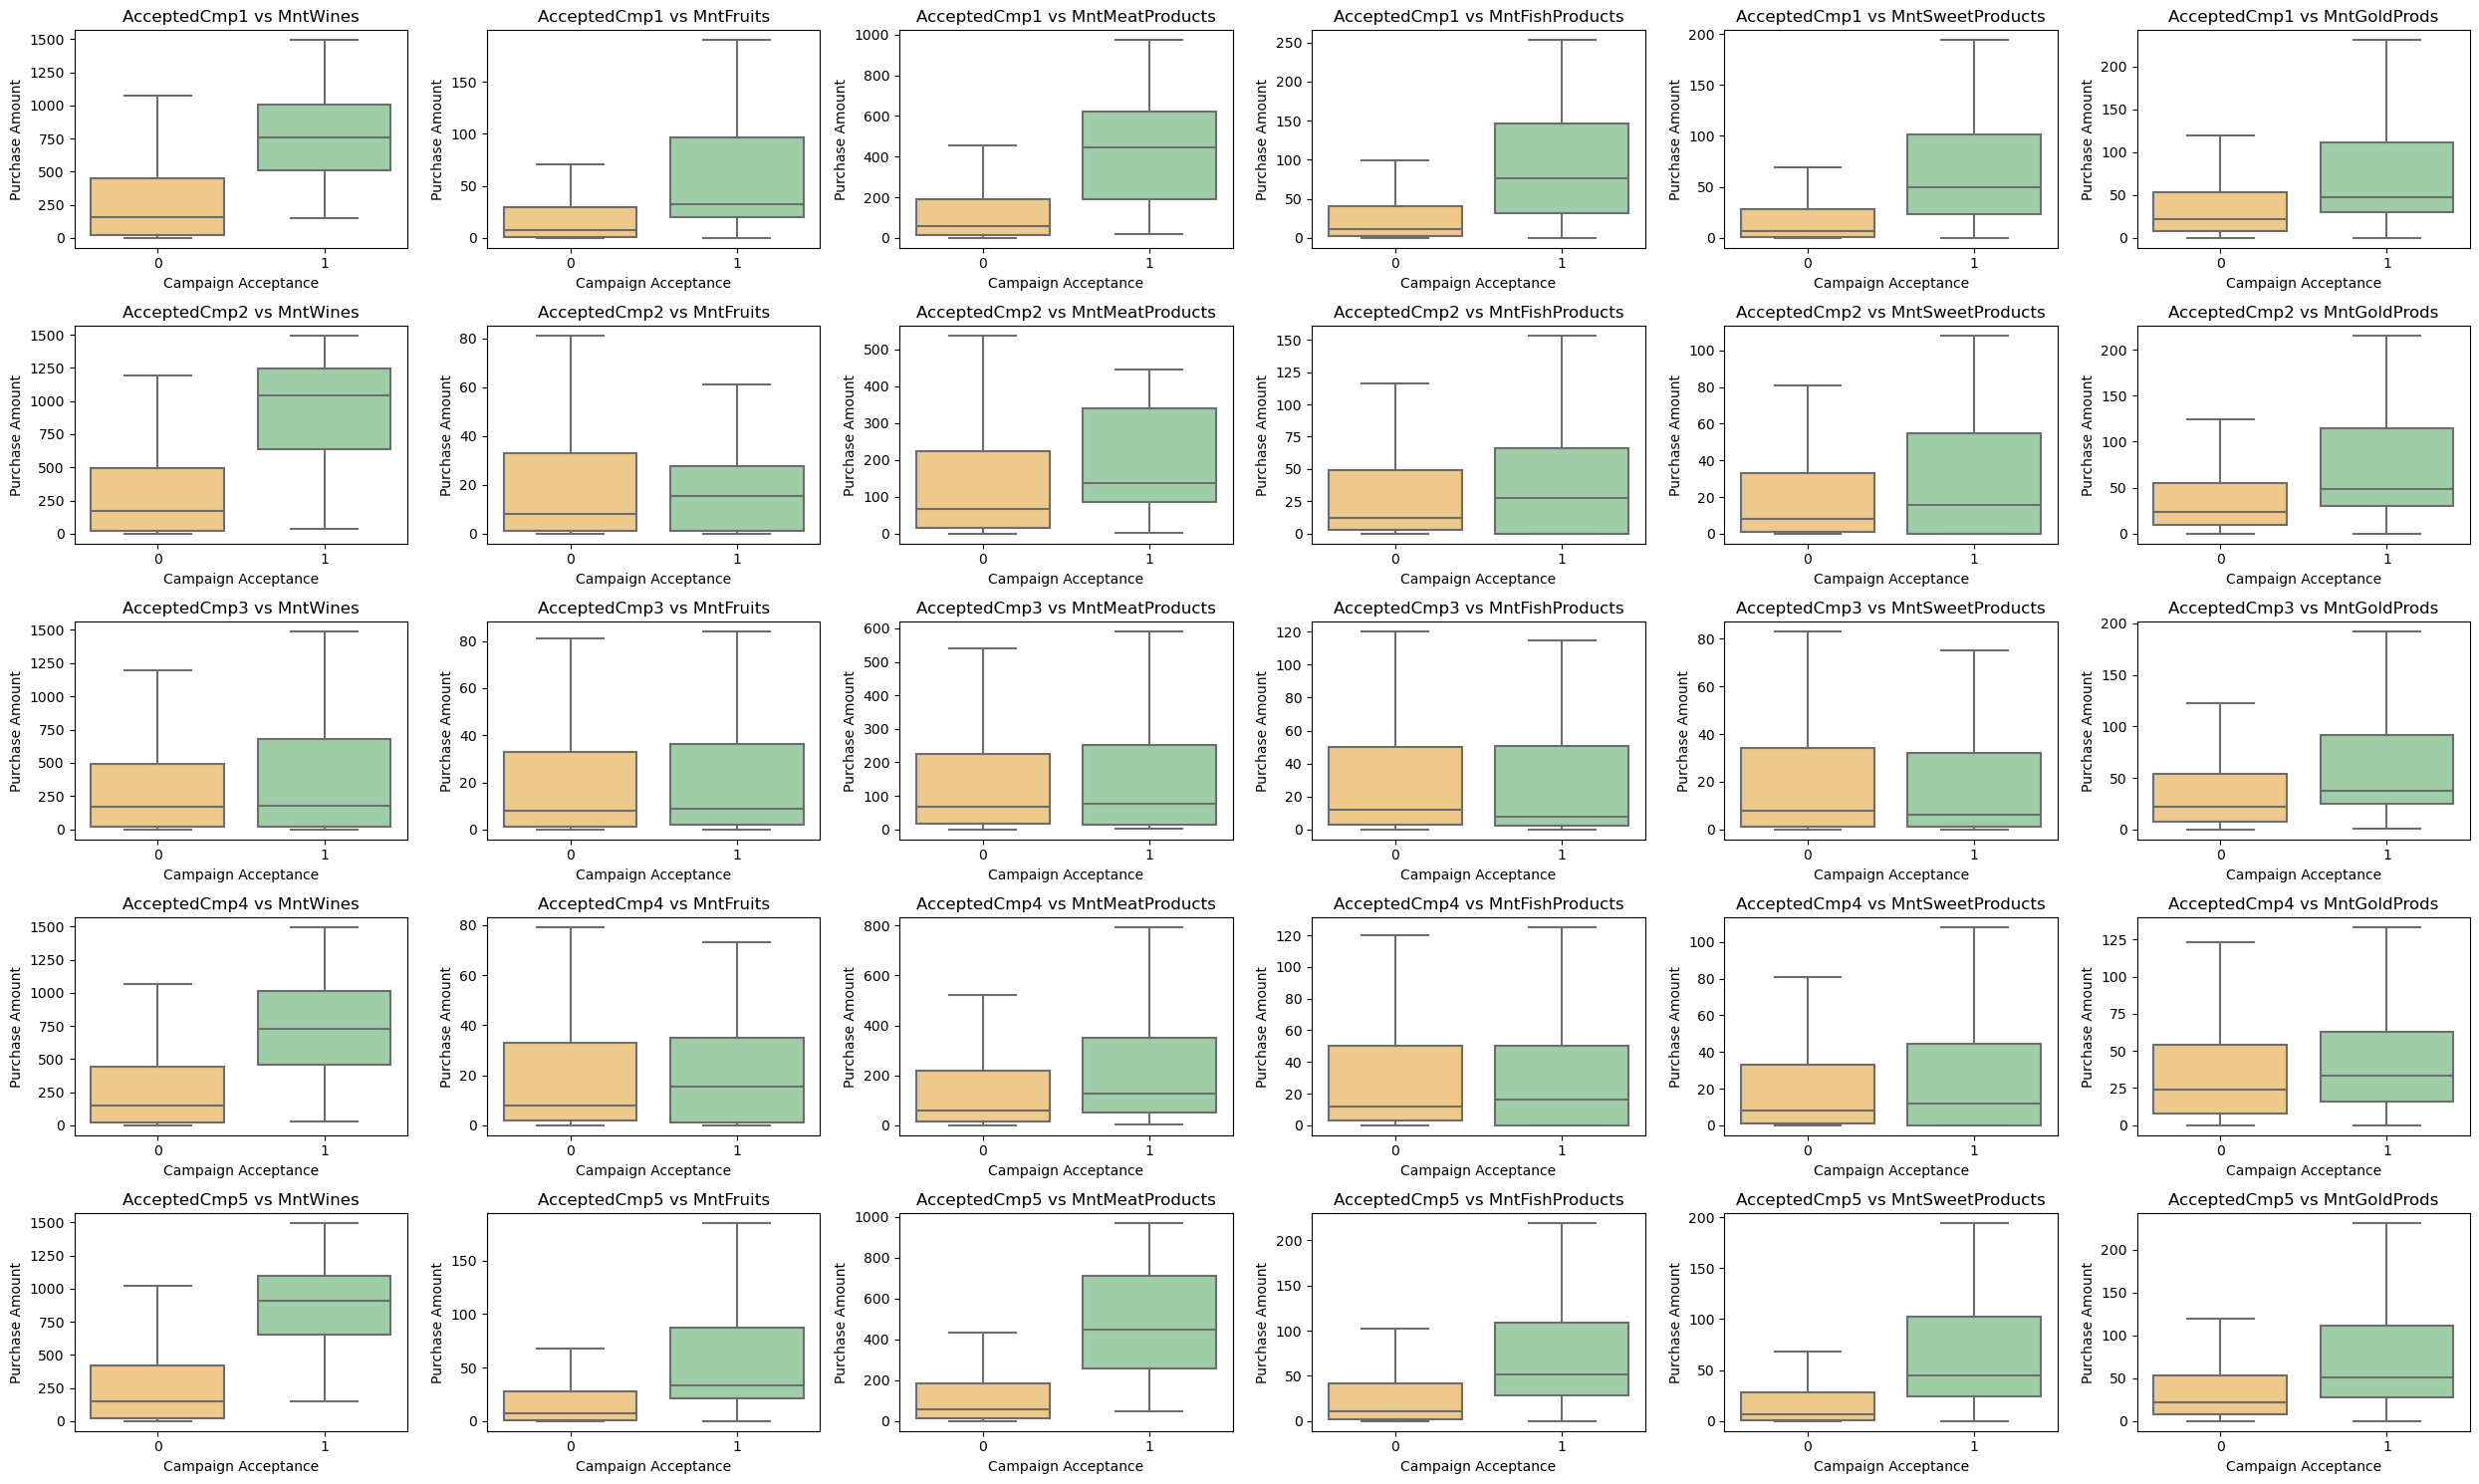

In [16]:

product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

colors = ["#fdce7c", "#96d5a4"]

# Creating boxplots
plt.figure(figsize=(25, 15))

# Number of rows in the grid
n_rows = len(campaign_columns)

for i, campaign in enumerate(campaign_columns):
    for j, product in enumerate(product_columns):
        plt.subplot(n_rows, len(product_columns), i*len(product_columns) + j + 1)
        
        # Creating the boxplot
        sns.boxplot(x=campaign, y=product, data=df_copy, palette=colors, showfliers=False)
        
        # Setting the title and labels
        plt.title(f'{campaign} vs {product}')
        plt.xlabel('Campaign Acceptance')
        plt.ylabel('Purchase Amount')
        
        # Ensuring a tight layout
        plt.tight_layout()

plt.show()


Dari diagram kotak terlihat bahwa perbedaan perilaku pembelian antara kelompok yang menerima dan tidak menerima kampanye bervariasi antar produk. Namun, pola yang berbeda muncul di AcceptedCmp3, dimana perbedaan antara kedua kelompok tidak signifikan, dan median jumlah pembelian relatif rendah. Hal ini menunjukkan bahwa kampanye AcceptedCmp3 tidak mempengaruhi perilaku pembelian pelanggan secara signifikan dibandingkan kampanye lainnya.

##### **Insight :**

- Secara umum, dapat diamati bahwa sebagian besar kampanye memiliki hubungan yang signifikan dengan jumlah pembelanjaan produk. Khususnya, di AcceptedCmp1 dan AcceptedCmp5, semua produk menunjukkan peningkatan pada kelompok yang menerima kampanye dibandingkan dengan kelompok yang tidak.

- Kampanye tertentu menampilkan peningkatan pembelian produk tertentu. Misalnya, AcceptedCmp2 dan AcceptedCmp4 menunjukkan peningkatan signifikan dalam pembelian 'MntWines', 'MntGoldProds', dan 'MntMeatProducts'. Hal ini menunjukkan bahwa strategi kampanye khusus tersebut efektif dalam mendongkrak penjualan produk tertentu.


#### **1e. Apakah ada hubungan antara kampanye dan saluran pembelian?**

Untuk memahami hubungan antara kampanye dan jumlah pembelian pada setiap saluran, kami akan melakukan pengujian hipotesis menggunakan hipotesis berikut: 

 - **Hipotesis Nol (H0)**: Median jumlah total pembelian di masing-masing saluran adalah sama atau lebih rendah bagi mereka yang menerima kampanye dibandingkan dengan mereka yang tidak.

- **Hipotesis Alternatif (H1)** : Median jumlah total pembelian di masing-masing saluran lebih tinggi bagi mereka yang menerima kampanye dibandingkan dengan mereka yang tidak.

In [17]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
channels_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

p_values_products = pd.DataFrame(index=channels_columns, columns=campaign_columns)

for channel in channels_columns:
    for campaign in campaign_columns:
        accepted = df_copy[df_copy[campaign] == 1][channel]
        not_accepted = df_copy[df_copy[campaign] == 0][channel]
        _, p_value = mannwhitneyu(accepted, not_accepted, alternative='greater')
        p_values_products.loc[channel, campaign] = p_value

p_values_products

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
NumWebPurchases,0.0,0.032368,0.046575,0.0,0.0
NumCatalogPurchases,0.0,0.0,0.000002,0.0,0.0
NumStorePurchases,0.0,0.000042,0.999899,0.0,0.0


Penafsirannya sebagai berikut:

**Jika nilai p rendah (≤ 0,05):**
Artinya, terdapat perbedaan pembelian yang signifikan dari masing-masing saluran antara pelanggan yang berpartisipasi dalam kampanye dan yang tidak. Dalam hal ini, kampanye dikaitkan dengan perubahan jumlah pembelian dari saluran.

**Jika nilai p tinggi (> 0,05):**
Hal ini menunjukkan bahwa tidak ada perbedaan pembelanjaan yang signifikan dari masing-masing saluran antara pelanggan yang berpartisipasi dan tidak berpartisipasi dalam kampanye. Di sini, kampanye tidak dikaitkan dengan perubahan signifikan dalam jumlah pembelian dari saluran.

Mari kita uraikan untuk setiap kampanye.
- **AcceptedCmp1** : Semua saluran menunjukkan nilai p 0,0, yang menunjukkan hubungan signifikan antara kampanye dan jumlah pembelian dari saluran.
- **AcceptedCmp2** : **NumCatalogPurchase** menunjukkan nilai di bawah 0,05, yang menunjukkan hubungan signifikan antara kampanye dan jumlah pembelian dari saluran ini.
- **AcceptedCmp3** : **NumWebPurchases** dan **NumCatalogPurchases** menunjukkan nilai di bawah 0,05, yang menunjukkan hubungan signifikan antara kampanye dan jumlah pembelian dari saluran.
- **AcceptedCmp4** : Semua saluran menunjukkan nilai p 0,0, yang menunjukkan hubungan signifikan antara kampanye dan jumlah pembelian dari saluran.
- **AcceptedCmp5** : Semua saluran menunjukkan nilai p 0,0, yang menunjukkan hubungan signifikan antara kampanye dan jumlah pembelian dari saluran.

##### **Insight :**

- Kampanye seperti AcceptedCmp1, AcceptedCmp4, dan AcceptedCmp5 menunjukkan hubungan yang kuat dengan jumlah pembelian di semua saluran, menyiratkan bahwa kampanye ini secara efektif meningkatkan pembelian dari berbagai saluran.

- Beberapa kampanye menunjukkan dampak yang signifikan pada saluran tertentu. Misalnya, AcceptedCmp2 secara khusus memengaruhi pembelian dari saluran NumCatalogPurchase, dan AcceptedCmp3 memiliki pengaruh signifikan terhadap NumWebPurchases dan NumCatalogPurchases. Hal ini menunjukkan bahwa kampanye tertentu sangat efektif dalam mendorong pembelian di saluran tertentu, dan mungkin selaras dengan interaksi pelanggan di platform tersebut.



#### **1f. Apakah ada hubungan antara kampanye dan kekinian pelanggan?**

In [18]:
for column in campaign_columns:
    table.loc['Yes', column] = df_copy[df_copy[column] == 1]['Recency'].median()
    table.loc['No', column] = df_copy[df_copy[column] == 0]['Recency'].median()

table

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Yes,44.0,43.5,38.0,55.0,52.0
No,49.0,49.0,50.0,49.0,49.0


Untuk pengujian ini, hipotesisnya adalah sebagai berikut:

 - **Hipotesis Nol (H0)**: Median kekinian sama atau lebih besar bagi mereka yang menerima kampanye dibandingkan dengan mereka yang tidak.

- **Hipotesis Alternatif (H1)** : Median keterkinian lebih kecil bagi mereka yang menerima kampanye dibandingkan dengan mereka yang tidak.


Jika hipotesis nol ditolak (nilai p < 0,05), hal ini menunjukkan bahwa menerima kampanye dikaitkan dengan pembelian yang lebih baru. Dan jika hipotesis nol tidak ditolak (p-value > 0,05), hal ini menunjukkan bahwa tidak ada cukup bukti statistik untuk mengatakan bahwa menerima kampanye dikaitkan dengan pembelian yang lebih baru.

In [19]:
p_value_table = pd.DataFrame(columns=campaign_columns, index=['p-value'])

for column in campaign_columns:
    accepted = df_copy[df_copy[column] == 1]['Recency']
    not_accepted = df_copy[df_copy[column] == 0]['Recency']
    
    _, p_value = mannwhitneyu(accepted, not_accepted, alternative='less')
    
    p_value_table.loc['p-value', column] = p_value

p_value_table 

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
p-value,0.14418,0.332109,0.062773,0.85732,0.470904


Dari hasil diatas kita peroleh semua nilai p lebih besar dari 0,05 yang berarti kita menerima h0. Implikasinya adalah kami tidak memiliki cukup bukti untuk mengatakan bahwa kampanye tersebut dikaitkan dengan pembelian baru-baru ini. Dengan kata lain, kampanye tidak dikaitkan dengan kekinian

### **`2. Wawasan apa yang dapat kita peroleh mengenai perilaku pembelian pelanggan berdasarkan informasi demografis mereka?`**

Kami akan menjawab pertanyaan-pertanyaan ini dengan memeriksa berbagai aspek informasi demografi pelanggan. Kami akan menganalisis jumlah pembelanjaan, frekuensi pembelian, preferensi produk, preferensi saluran, dan penerimaan kampanye sehubungan dengan latar belakang demografi pelanggan. Analisis komprehensif ini akan membantu kita memahami pengaruh faktor demografi terhadap perilaku pembelian dan preferensi pelanggan.

#### **2a. Bagaimana distribusi demografis pelanggan?**

Untuk memulai, mari kita selidiki komposisi demografis basis pelanggan kita dengan memeriksa distribusi dalam setiap kategori demografis. Kami akan memeriksanya melalui empat aspek utama: pendidikan, kelompok umur, kelas pendapatan, dan ukuran keluarga. Visualisasi ini bertujuan untuk memberikan gambaran besar mengenai karakteristik pelanggan.

In [20]:
df_x = df_copy.copy()
df_x['IncomeClass'] = df_x['IncomeClass'].replace(['Rich', 'Upper Middle'], 'Other')

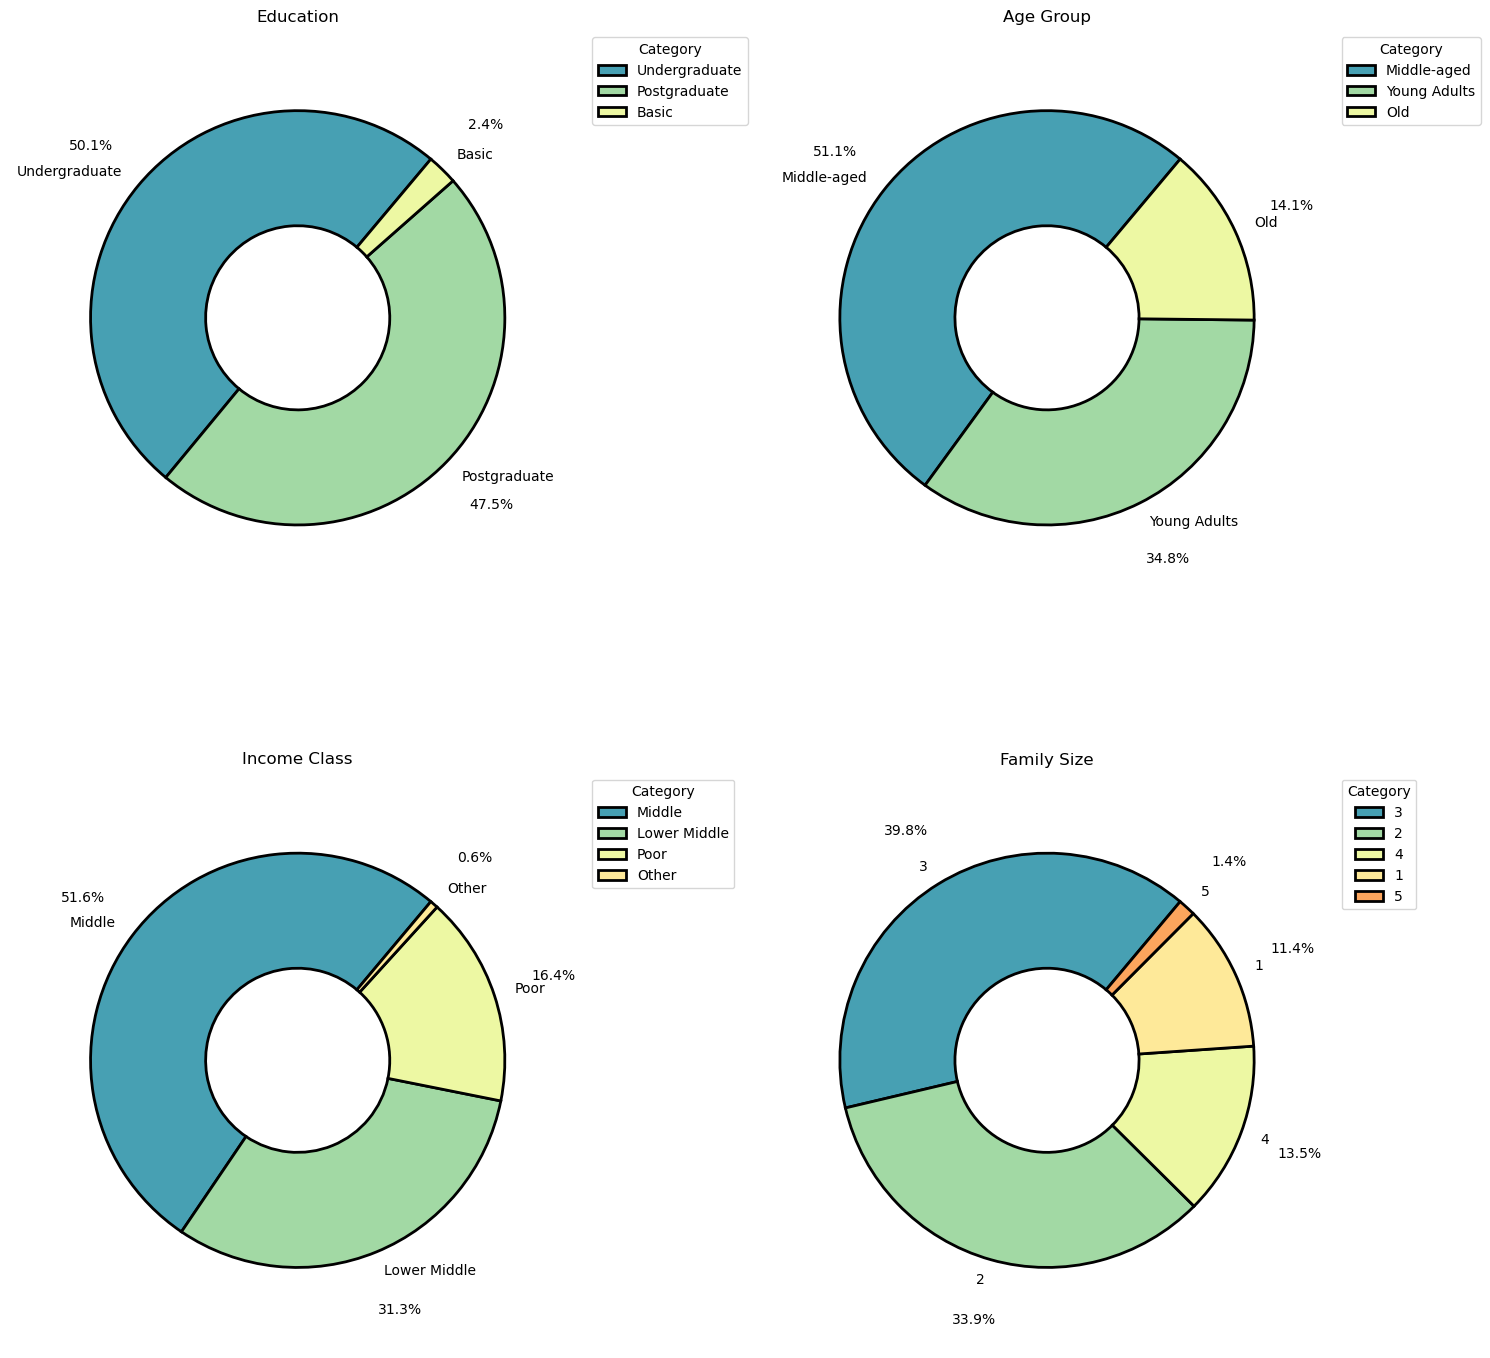

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
columns_to_plot = ['Education', 'Age_Group', 'IncomeClass', 'FamilySize']
titles = ['Education', 'Age Group', 'Income Class', 'Family Size']

colors = ['#ed6345', '#fdce7c', '#d1ec9c', '#96d5a4', '#fef1a7']

for i, ax in enumerate(axs.ravel()):
    column = columns_to_plot[i]
    title = titles[i]
    
    value_counts = df_x[column].value_counts(normalize=True)
    
    wedges, texts, autotexts = ax.pie(value_counts, labels=value_counts.index,
                                      textprops=dict(size=10, color="black"),
                                      autopct=lambda pct: f"{pct:.1f}%",
                                      pctdistance=1.3,  # Adjust this to move percentage labels
                                      radius=.9, 
                                      colors=sns.color_palette("Spectral_r"),
                                      shadow=False,
                                      wedgeprops=dict(width=0.5, edgecolor="black", linewidth=2),
                                      startangle=50)
    ax.set_title(title)
    
    # Adding a legend
    ax.legend(wedges, value_counts.index, title="Category", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Increase the size of the percentage labels and set the color
    for text in autotexts:
        text.set_size(10)
        text.set_color('black')
    
plt.tight_layout()
plt.show()


Dari diagram lingkaran di atas kita dapat melihat bahwa :

1. **Education**:
    - Mayoritas pelanggan telah memperoleh pendidikan tinggi, baik sarjana maupun pascasarjana.
    - 50,1% pelanggan memiliki gelar sarjana.
    - 47,5% pelanggan telah menempuh pendidikan pascasarjana.
    - Persentase terendah, 2,4%, diwakili oleh pelanggan dengan pendidikan dasar.


2. **Age Group**:
    - Pelanggan paruh baya mendominasi, mencakup 51,1% basis pelanggan.
    - Dewasa muda merupakan kelompok terbesar kedua, yaitu 34,8%.
    - Pelanggan berusia lanjut merupakan pelanggan yang paling sedikit jumlahnya, yaitu sebesar 14,1%.


3. **Income Class**:
    - Pelanggan dalam kelas pendapatan menengah merupakan mayoritas, yaitu sebesar 51,6%.
    - Pelanggan kelas menengah ke bawah merupakan konsumen terbesar kedua, yaitu sebesar 31,3%.
    - Pelanggan dengan kategori pendapatan buruk berjumlah 14,1%.
    - Persentase gabungan pelanggan menengah ke atas dan kaya adalah 0,7%.


4. **Family Size**:
    - Pelanggan tunggal, atau pelanggan dengan jumlah anggota keluarga 1 orang, berjumlah 39,8%.
    - Pelanggan dengan ukuran keluarga 2 mewakili 33,9%.
    - Pelanggan dengan jumlah anggota keluarga 3 orang berjumlah 13,5%.
    - Pelanggan dengan ukuran keluarga 4 orang mencapai 11,4%.
    - Pelanggan dengan ukuran keluarga 5 orang menyumbang 1,4%.
    
##### **Insight**
Secara umum, terlihat bahwa mayoritas pelanggan IndoMarket memiliki latar belakang pendidikan jenjang sarjana dan pascasarjana. Sebagian besar pelanggan sebagian besar berasal dari kelas pendapatan menengah dan menengah ke bawah, kelompok usia menengah, dan ukuran keluarga sebagian besar terdiri dari satu atau dua anggota.

Sekarang, kami akan menjawab sub-pertanyaan untuk mengamati perbedaan setiap kategori dalam hal jumlah pembelanjaan, frekuensi pembelian, preferensi produk, dan preferensi saluran.

#### **2b. Bagaimana perbedaan jumlah pembelanjaan & frekuensi pembelian di berbagai kategori pelanggan?**

Untuk membandingkan perbedaan karakteristik pelanggan berdasarkan jumlah pembelanjaan dan frekuensi pembelian, kita akan menggunakan nilai median jumlah pembelanjaan. Keputusan ini disebabkan oleh distribusi data yang tidak normal pada kolom T_AmountSpent dan T_NPurchase. Untuk memastikan distribusinya, kami akan menggunakan uji normalitas.

In [22]:
# check T_AmountSpent normality

stats, pval=normaltest(df_copy['T_AmountSpent'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


In [23]:
# check T_NPurchase normality

stats, pval=normaltest(df_copy['T_NPurchase'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


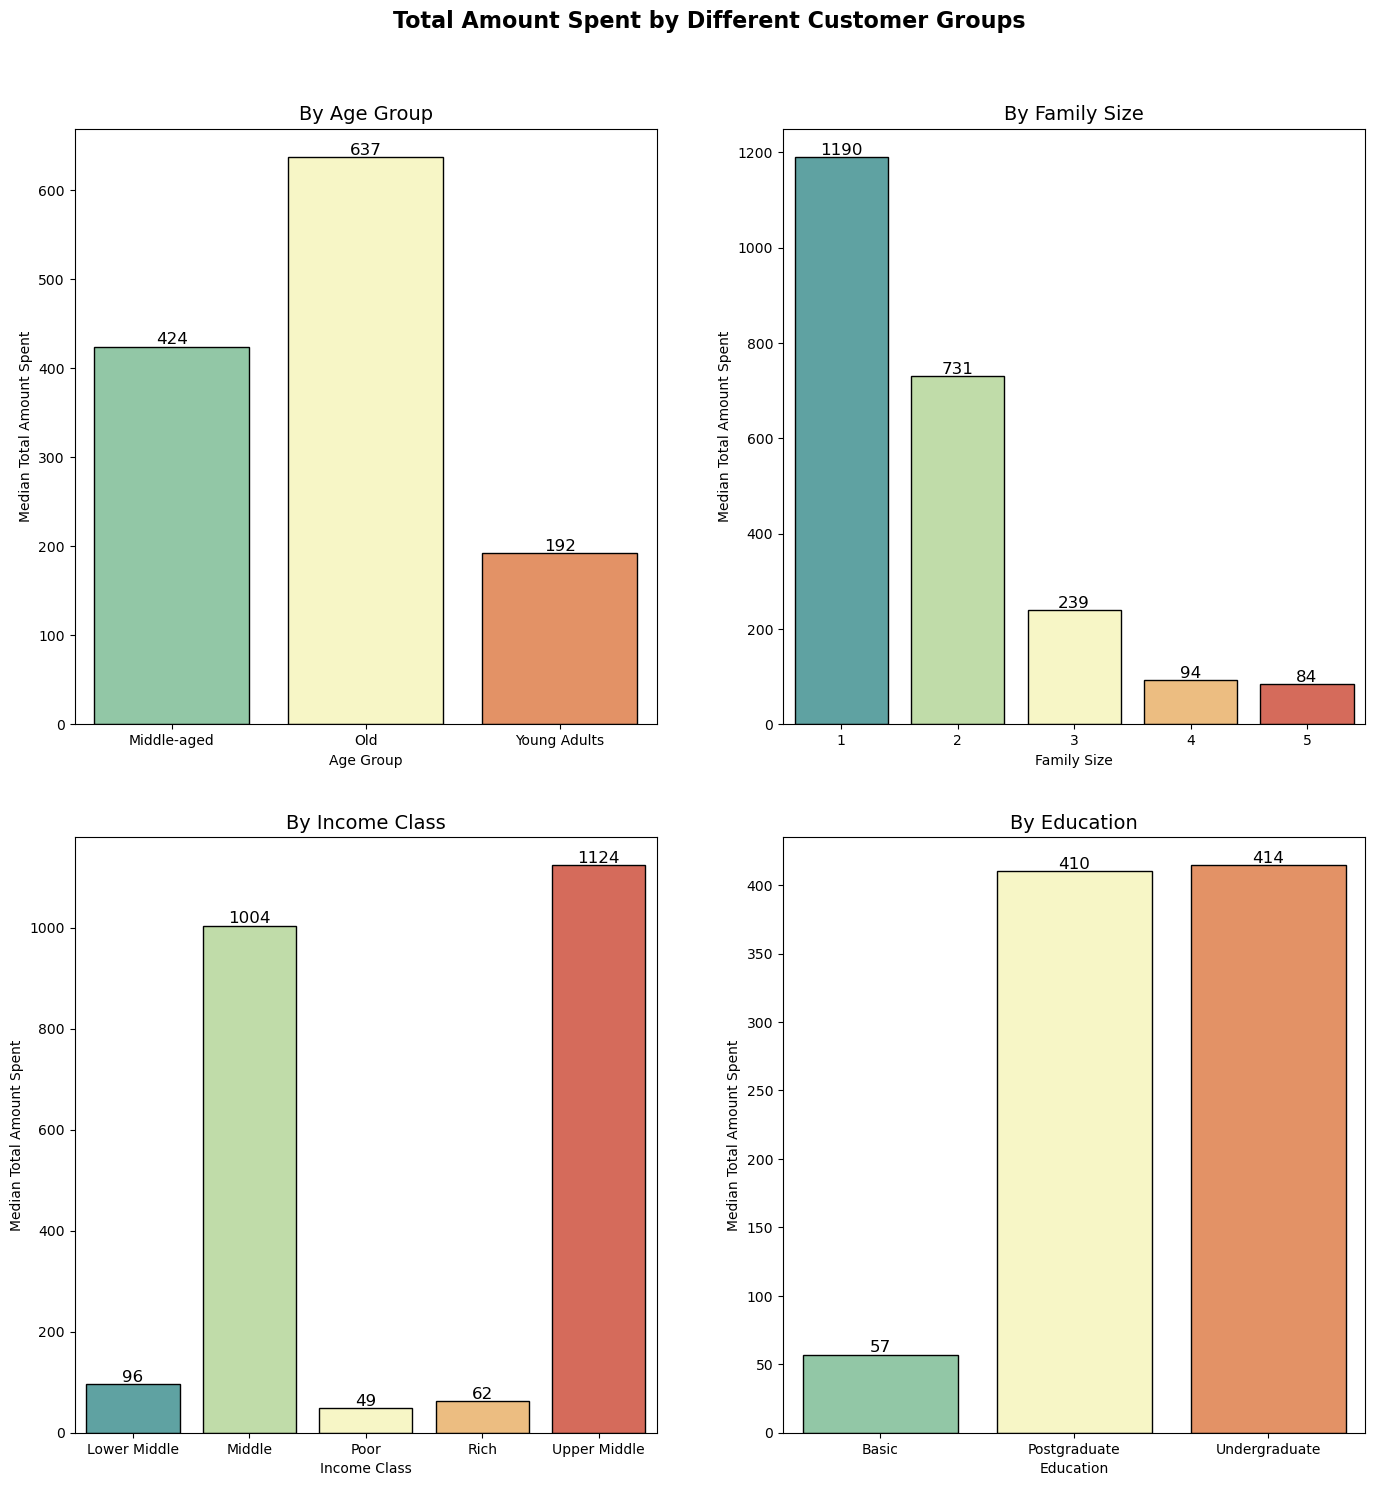

In [24]:
groups = [('Age_Group', 'Age Group'), ('FamilySize', 'Family Size'),
          ('IncomeClass', 'Income Class'), ('Education', 'Education')]

# grid and size
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
plt.tight_layout(pad=6.0)

fig.suptitle('Total Amount Spent by Different Customer Groups', fontsize=16, y=1.02, fontweight='bold')

def createplot(df, column, title, ax):
    bar_plot = sns.barplot(data=df, x=column, y='T_AmountSpent', palette='Spectral_r', ax=ax, orient='v', edgecolor='black')
    ax.set_title(f'By {title}', fontsize=14)
    ax.set_ylabel('Median Total Amount Spent')
    ax.set_xlabel(title)
    
    for p in bar_plot.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

for i, (group, title) in enumerate(groups):
    row = i // 2
    col = i % 2
    grouped_data = df_copy.groupby(group).agg({'T_AmountSpent': 'median'}).reset_index()
    createplot(grouped_data, group, title, axs[row, col])

plt.show()


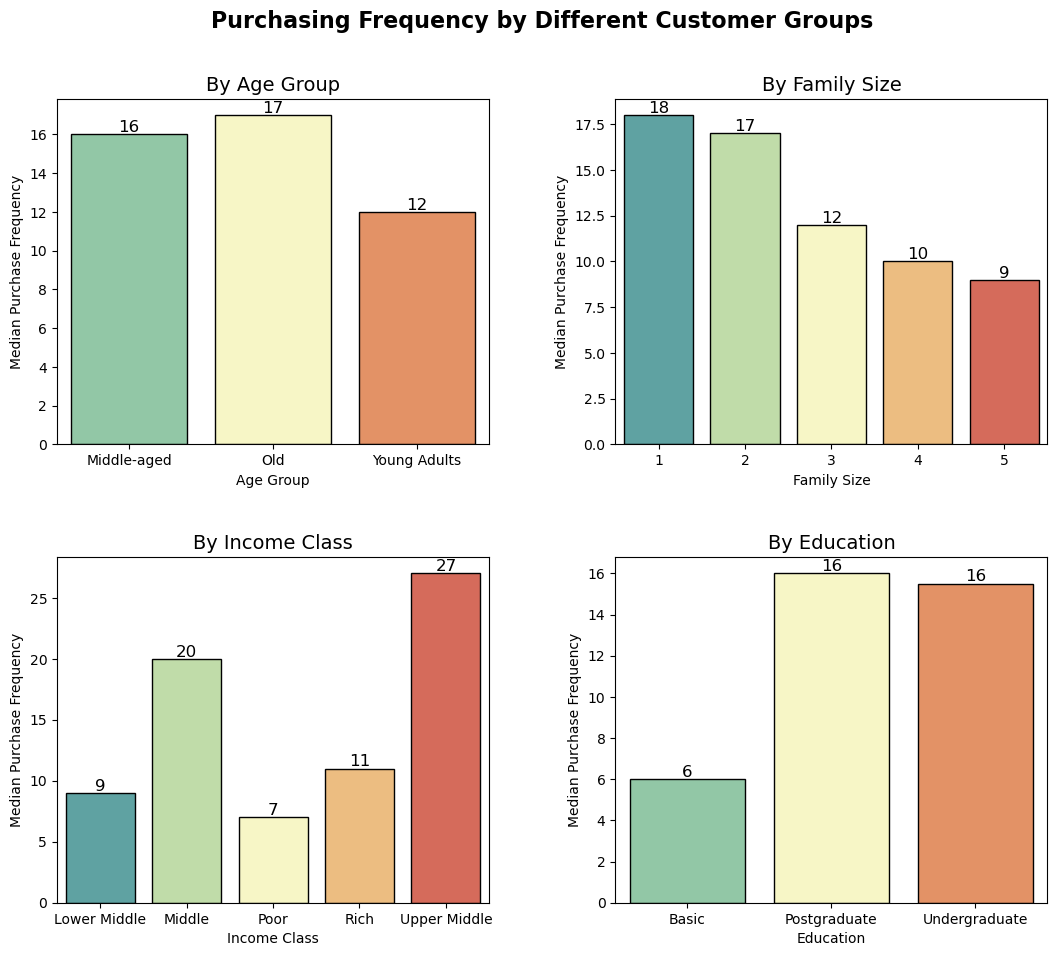

In [25]:
groups = [('Age_Group', 'Age Group'), ('FamilySize', 'Family Size'),
          ('IncomeClass', 'Income Class'), ('Education', 'Education')]

# creating grid & specify size
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
plt.tight_layout(pad=6.0)
# creating title
fig.suptitle('Purchasing Frequency by Different Customer Groups', fontsize=16, y=1, fontweight='bold')

# creating function for plotting
def createplot(df, column, title, ax):
    bar_plot = sns.barplot(data=df, x=column, y='T_NPurchase', palette='Spectral_r', ax=ax, edgecolor='black')
    ax.set_title(f'By {title}', fontsize=14)
    ax.set_ylabel('Median Purchase Frequency')
    ax.set_xlabel(title)
    for p in bar_plot.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
# looping through groups and plotting
for i, (group, title) in enumerate(groups):
    row = i // 2
    col = i % 2
    grouped_data = df_copy.groupby(group).agg({'T_NPurchase': 'median'}).reset_index()
    createplot(grouped_data, group, title, axs[row, col])

plt.show()


Dari grafik di atas, kita dapat melihat bahwa:

- **Age Category:**
    - Pada kategori usia, jumlah pembelanjaan dan frekuensi pembelian tertinggi terdapat pada kelompok usia 'Tua' dengan median jumlah pembelanjaan $637, dengan MAD ±16234, diikuti oleh 'Paruh Baya' dan 'Dewasa Muda'. 
    - Frekuensi antara usia tua dan paruh baya hanya sedikit berbeda. Hal ini menunjukkan bahwa individu lanjut usia cenderung membelanjakan lebih banyak, kemungkinan karena pendapatan yang dapat dibelanjakan lebih tinggi atau preferensi konsumsi yang berbeda.


- **Family Size:**
    - Pelanggan dengan jumlah anggota keluarga satu orang memiliki jumlah pembelanjaan tertinggi dengan median jumlah pembelanjaan $1190, dengan MAD ±16234. Sedangkan mereka yang memiliki jumlah anggota keluarga empat dan lima orang mempunyai pengeluaran paling sedikit
    - Terdapat tren yang menunjukkan bahwa jumlah pengeluaran menurun seiring bertambahnya jumlah anggota keluarga. 
    - Dari grafik ini dapat diartikan bahwa individu yang lajang mempunyai pengeluaran yang lebih tinggi, atau komoditas yang dibeli oleh para lajang relatif lebih mahal. Pola yang sama juga ditemukan pada frekuensi pembelian. 


- **Income Class:**
    - Meninjau kelas pendapatan, jumlah pengeluaran dan frekuensi pembelian tertinggi terdapat di 'Menengah' dengan jumlah pengeluaran rata-rata $1004, dengan MAD ±16234. Kelas "Menengah Atas" menyusul dengan median $1124, dengan MAD ±16234. 
    - Meski hanya berjumlah 7% dari sampel, kelas “Menengah Atas” mendominasi baik dari segi frekuensi pembelian maupun volume transaksi. Hal ini dapat disebabkan oleh pembelian barang yang lebih mahal atau pembelian dalam jumlah besar.

- **Education Level:**
    - Dalam hal tingkat pendidikan, pengeluaran dan frekuensi pembelian terendah terdapat pada kategori “Dasar” yang membelanjakan paling sedikit dengan jumlah rata-rata $57 ± 16234 MAD, sedangkan tingkat “Sarjana” dan “Pascasarjana” menghabiskan lebih banyak, sekitar $414 ± 16234 GILA. 
    - Pelanggan dengan latar belakang pendidikan sarjana dan pascasarjana dapat menjadi fokus strategi bisnis dan upaya pemasaran karena jumlah pembelanjaan mereka yang sering dan relatif tinggi.

#### **2c. Bagaimana perbedaan preferensi produk di berbagai demografi pelanggan?**

Sekarang kita akan melihat preferensi produk di berbagai kategori demografi.

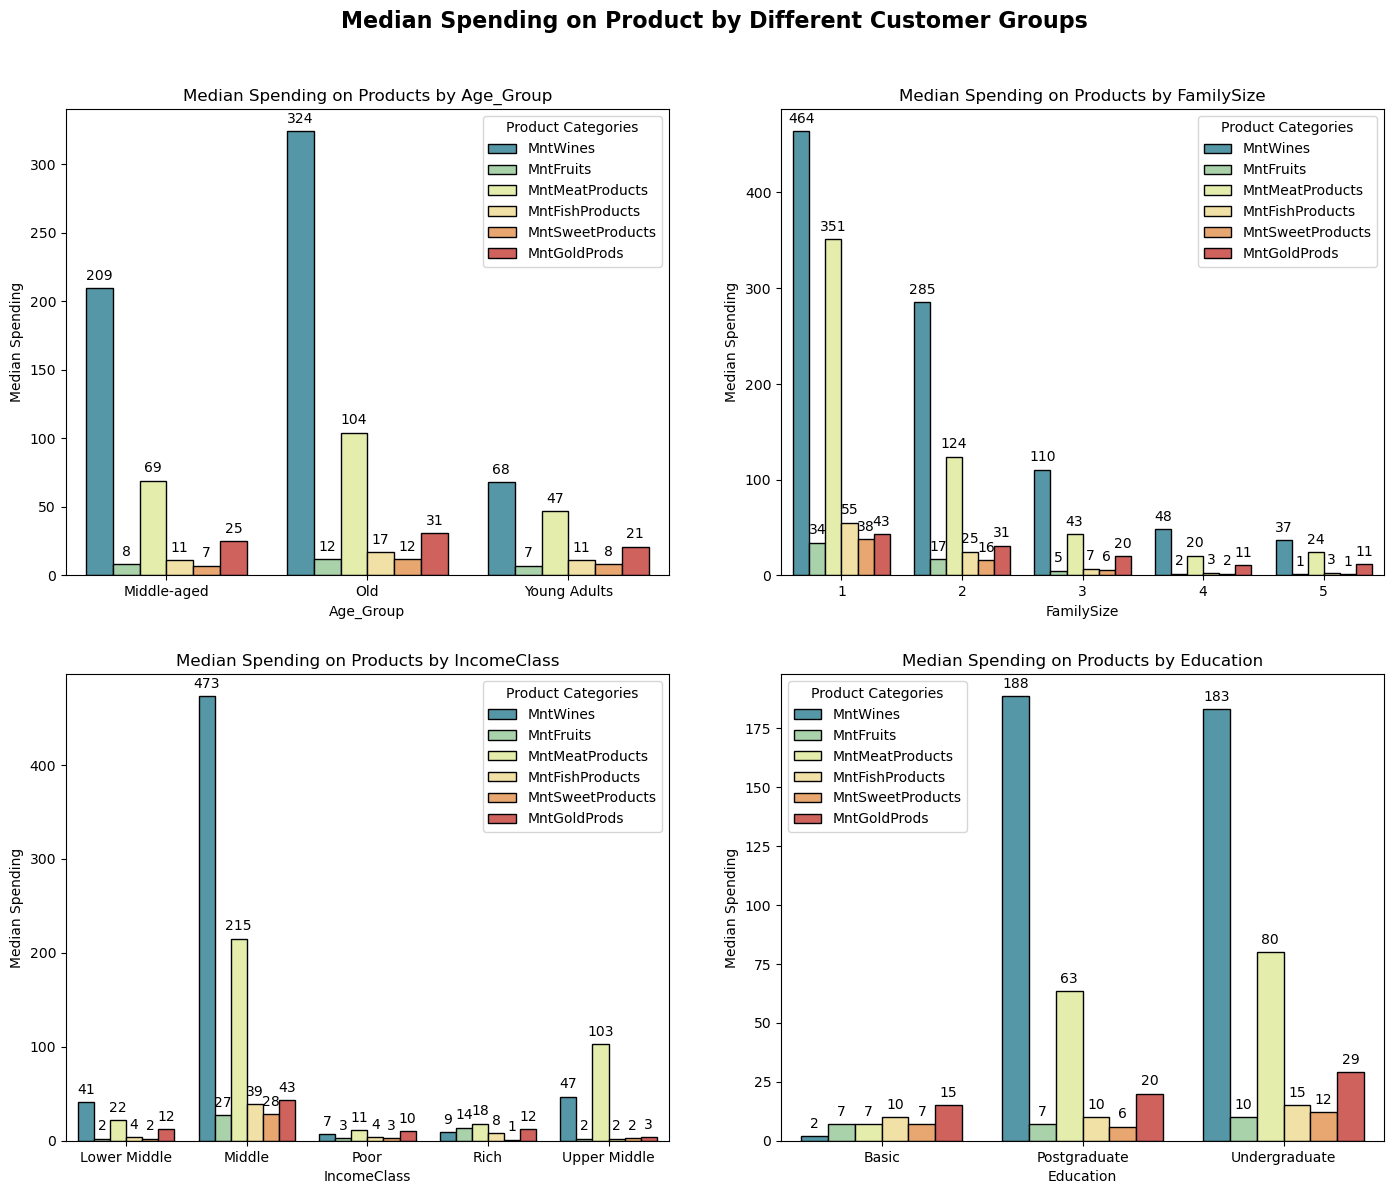

In [26]:
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
cust_group = ['Age_Group', 'FamilySize', 'IncomeClass', 'Education']

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
plt.tight_layout(pad=5.0)

fig.suptitle('Median Spending on Product by Different Customer Groups', fontsize=16, y=1.02, fontweight='bold')

for i, group in enumerate(cust_group):
    
    row = i // 2
    col = i % 2
    
    grouped_data = df_copy.groupby(group)[products].median().reset_index().melt(id_vars=[group])
   
    ax = sns.barplot(data=grouped_data, x=group, y='value', hue='variable', palette='Spectral_r', ax=axs[row, col], edgecolor='black')
    
    axs[row, col].set_title(f'Median Spending on Products by {group}')
    axs[row, col].set_xlabel(group)
    axs[row, col].set_ylabel('Median Spending')
    axs[row, col].legend(title='Product Categories')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')
    
plt.show()

**Age Category:**

- Anggur muncul sebagai produk paling dominan di semua kategori umur.
- Pada kategori usia 'Tua', konsumsi anggur dan daging merupakan yang tertinggi, dengan median pengeluaran sebesar $324 dan MAD sebesar ±165. Sebaliknya, kategori 'Dewasa Muda' memiliki median pengeluaran terendah yaitu $68, dengan MAD ±165.
- Meskipun terdapat perbedaan yang signifikan dalam pengeluaran untuk anggur dan daging di berbagai kategori umur, pengeluaran untuk produk emas tidak menunjukkan banyak fluktuasi.

**Family Size:**

- Anggur adalah pembelian utama di semua ukuran keluarga, dengan median pengeluaran tertinggi adalah $464 dan MAD ±165.
- Dalam keluarga besar yang terdiri dari 3, 4, dan 5 orang, produk anggur, daging, dan emas tampaknya menjadi pembelian utama yang dilakukan dari IndoMarket.

**Income Class:**

- Pelanggan berpendapatan menengah melakukan pembelian terbanyak, diikuti oleh kelas menengah atas.
- Anggur dan daging merupakan produk utama yang dibeli oleh kelas menengah, menengah ke bawah, dan menengah atas. Namun, pada kategori menengah atas dan kaya, pembelian daging melebihi pembelian anggur.
- Untuk kategori 'Miskin', pengeluaran untuk daging dan emas lebih tinggi dibandingkan dengan anggur, hal ini menunjukkan bahwa produk-produk ini mungkin tidak terlalu sensitif terhadap variasi harga.

**Education Level:**
- Tidak ada perbedaan signifikan dalam volume pembelian antara mahasiswa pascasarjana dan sarjana di berbagai produk.
- Bagi konsumen dengan tingkat pendidikan dasar, emas tampaknya menjadi produk yang paling sering dibeli.

#### **2d. Apa perbedaan preferensi saluran pembelian di berbagai demografi pelanggan?**

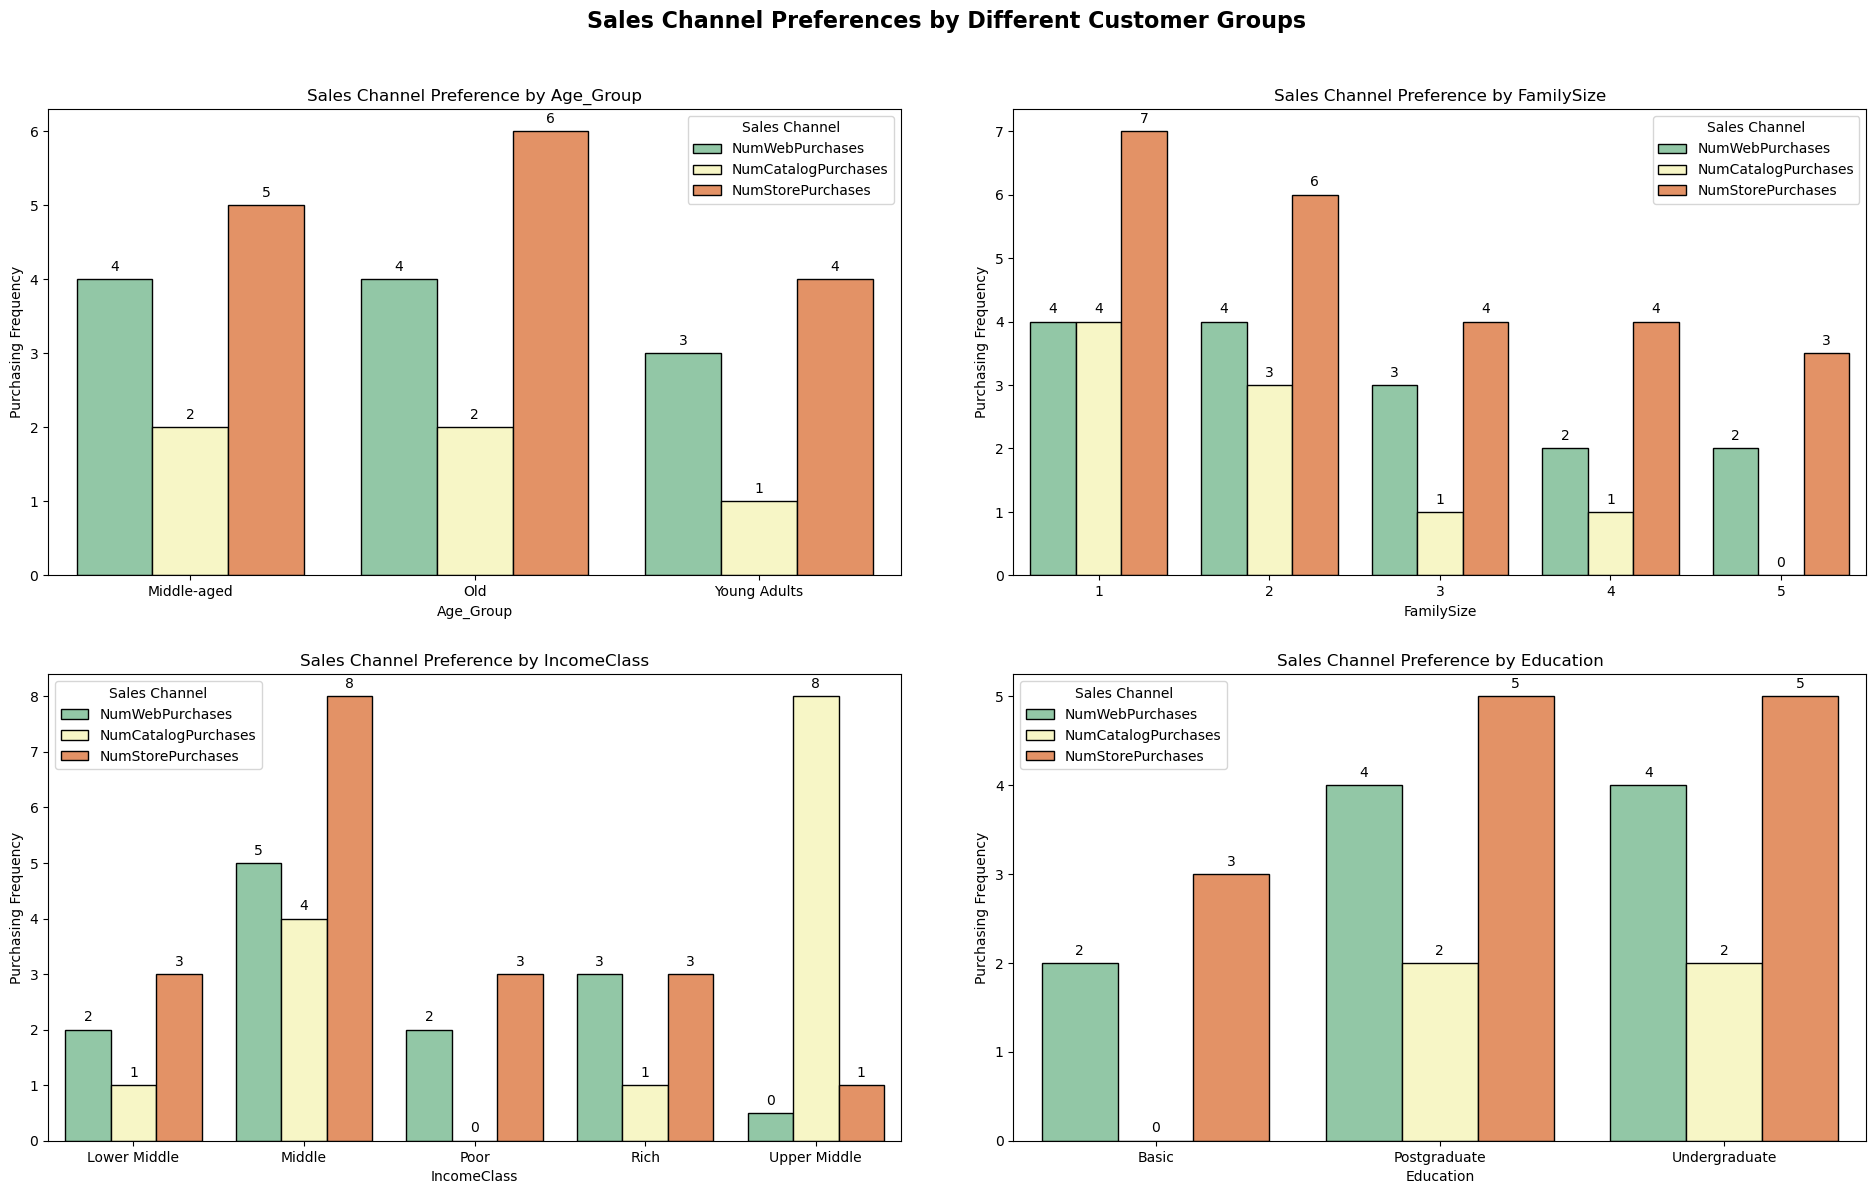

In [27]:
channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
cust_group = ['Age_Group', 'FamilySize', 'IncomeClass', 'Education']


fig, axs = plt.subplots(2, 2, figsize=(20, 12))
plt.tight_layout(pad=5.0)

fig.suptitle('Sales Channel Preferences by Different Customer Groups', fontsize=16, y=1.02, fontweight='bold')

for i, group in enumerate(cust_group):
  
    row = i // 2
    col = i % 2

    grouped_data = df_copy.groupby(group)[channels].median().reset_index().melt(id_vars=[group])

    ax = sns.barplot(data=grouped_data, x=group, y='value', hue='variable', palette='Spectral_r', ax=axs[row, col], edgecolor='black')

    axs[row, col].set_title(f'Sales Channel Preference by {group}')
    axs[row, col].set_xlabel(group)
    axs[row, col].set_ylabel('Purchasing Frequency')
    axs[row, col].legend(title='Sales Channel')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

plt.show()

Dari grafik di atas, kita dapat melihat bahwa:

**Age Category:**
- Saluran pembelian yang paling sering digunakan di semua kategori umur adalah pembelian di toko, diikuti dengan pembelian yang dilakukan melalui situs web.
- Frekuensi pembelian kesepakatan dan pembelian katalog setara di setiap grup.

 **Family Size:**
- Saluran pembelian yang dominan di setiap kategori adalah pembelian di toko, disusul pembelian web.
- Minat pembelian katalog paling tinggi di kalangan pelanggan tunggal dan menurun seiring bertambahnya jumlah anggota keluarga. Pembelian katalog dapat menjadi strategi untuk menargetkan pelanggan dengan ukuran keluarga yang lebih kecil.

**Income Class:**
- Pembelian di dalam toko merupakan saluran dominan di kelas pendapatan menengah ke bawah, menengah, dan miskin.
- Pembelian katalog paling populer di kalangan kelas menengah atas.

**Education Level:**
- Pembelian di dalam toko merupakan saluran tertinggi di setiap kategori, disusul pembelian dari website..
- Pada kategori dasar, pembelian katalog kurang diunggulkan.

#### **2e. Bagaimana perbedaan respons terhadap transaksi di berbagai demografi pelanggan?**

In [28]:
stats, pval=normaltest(df_copy['NumDealsPurchases'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


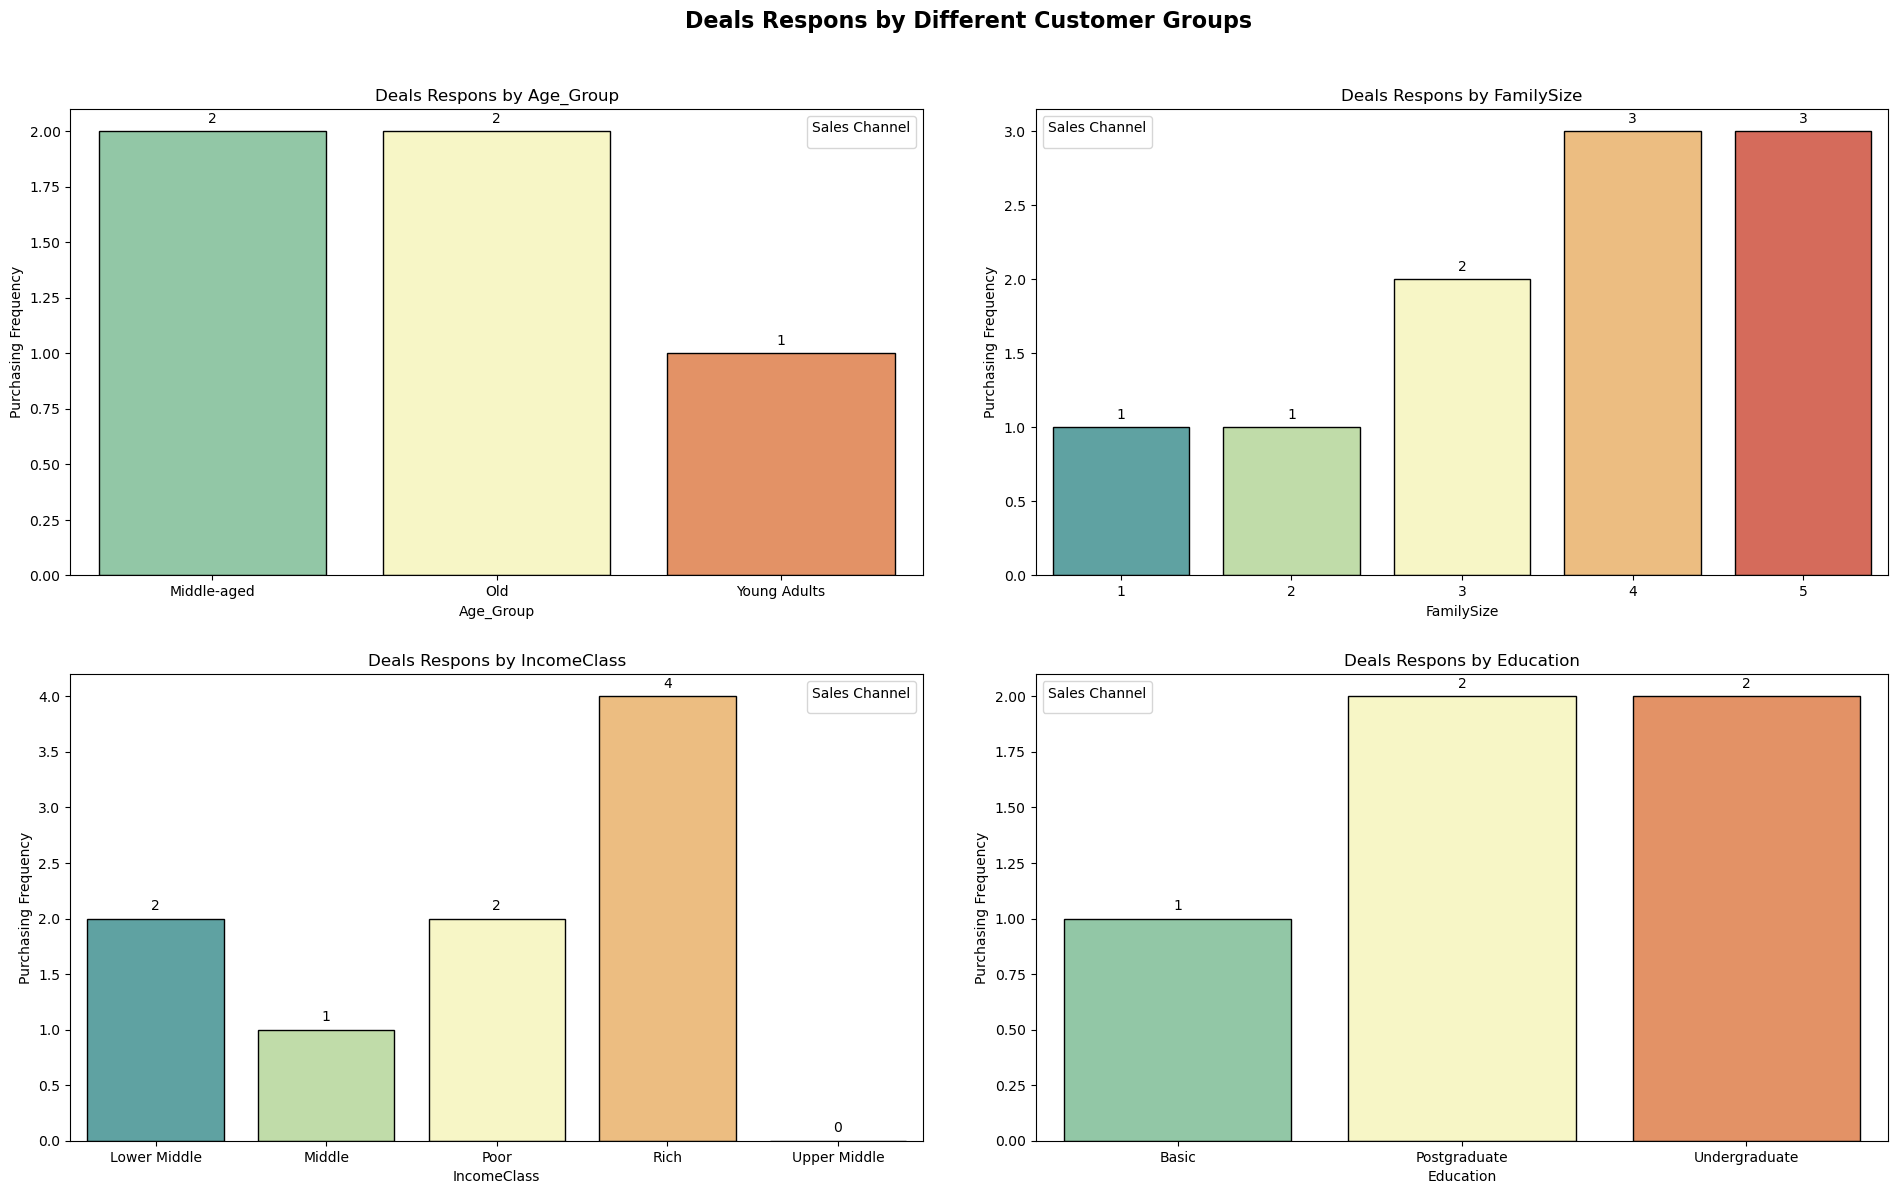

In [29]:
deals = ['NumDealsPurchases']
cust_group = ['Age_Group', 'FamilySize', 'IncomeClass', 'Education']

fig, axs = plt.subplots(2, 2, figsize=(20, 12))
plt.tight_layout(pad=5.0)

fig.suptitle('Deals Respons by Different Customer Groups', fontsize=16, y=1.02, fontweight='bold')

for i, group in enumerate(cust_group):
    row = i // 2
    col = i % 2
    grouped_data = df_copy.groupby(group)[deals].median().reset_index().melt(id_vars=[group])
    ax = sns.barplot(data=grouped_data, x=group, y='value', palette='Spectral_r', ax=axs[row, col], edgecolor='black')
    axs[row, col].set_title(f'Deals Respons by {group}')
    axs[row, col].set_xlabel(group)
    axs[row, col].set_ylabel('Purchasing Frequency')
    axs[row, col].legend(title='Sales Channel')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

plt.show()

**Age Group:**

- Orang dewasa muda dan individu paruh baya tampaknya melakukan pembelian dengan tingkat median yang lebih tinggi dibandingkan dengan kelompok usia tua.

**Education:**

- Pelanggan dengan tingkat pendidikan dasar cenderung membeli lebih banyak promo, sedangkan pelanggan dengan gelar PhD cenderung membeli lebih sedikit promo.

**Family Size:**

- Jumlah rata-rata transaksi yang dibeli tampaknya sedikit menurun seiring bertambahnya jumlah anggota keluarga, dengan beberapa variasi.

**Income Class:**

- Kelas menengah ke bawah dan kelas miskin cenderung membeli lebih banyak barang dibandingkan dengan kelas menengah dan menengah atas.

#### **2f. Apa perbedaan penerimaan kampanye dengan berbagai demografi pelanggan?**

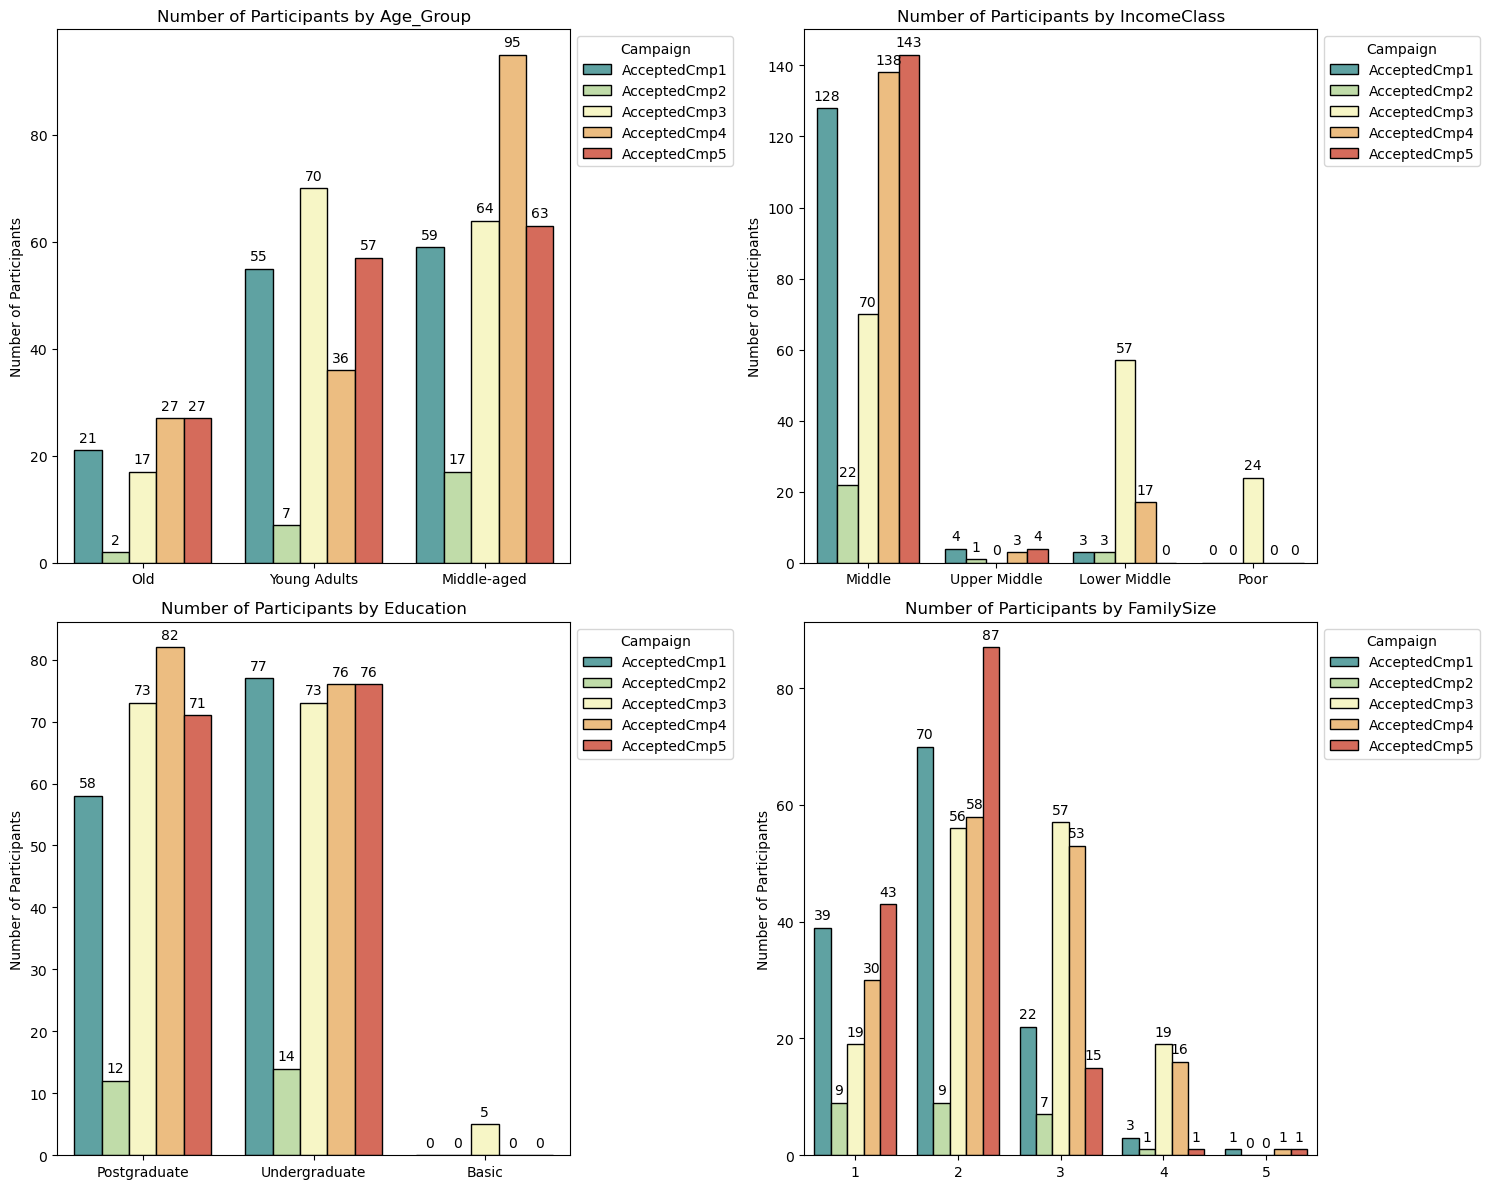

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
columns_to_analyze = ['Age_Group', 'IncomeClass', 'Education', 'FamilySize']

for ax, col in zip(axs.flatten(), columns_to_analyze):
    # Melting the DataFrame to have one column for the responses
    melted_df = df_copy.melt(id_vars=col, value_vars=campaign_columns, var_name='Campaign', value_name='Response')
    
    # Keeping only accepted responses
    melted_df = melted_df[melted_df['Response'] == 1]
    
    # Creating a countplot
    ax = sns.countplot(data=melted_df, x=col, hue='Campaign', palette='Spectral_r', ax=ax, edgecolor='black')
    
    ax.set_title(f'Number of Participants by {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Number of Participants')
    ax.legend(title='Campaign', bbox_to_anchor=(1, 1), loc='upper left')
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()


1. **Age Group**
- AcceptedCmp1 sebagian besar diterima oleh kelompok paruh baya, diikuti oleh dewasa muda. Jumlah peserta terbanyak pada kelompok usia paruh baya adalah 95 orang. Terdapat penurunan penerimaan yang nyata pada kelompok usia lanjut.
- Kampanye-kampanye lain juga nampaknya lebih disukai oleh kelompok usia paruh baya dan muda, sedangkan kelompok usia lanjut kurang menunjukkan minat terhadap seluruh kampanye.

2. **Income Class**
- Kelas pendapatan menengah sebagian besar berpartisipasi dalam AcceptedCmp1. Terdapat penurunan partisipasi yang signifikan dari kelompok pendapatan menengah ke bawah dan menengah ke atas, dan tidak ada partisipasi dari kelompok pendapatan miskin.
- Tren serupa juga terlihat pada kampanye lain, di mana kelas menengah tampaknya menjadi target audiens utama yang menunjukkan minat.

3. **Education**
- Peserta dengan pendidikan sarjana menunjukkan penerimaan tertinggi untuk AcceptedCmp1, diikuti oleh mereka yang berpendidikan pascasarjana. Kategori pendidikan lainnya memiliki partisipasi minimal atau bahkan tidak ada sama sekali.
- Tren serupa juga terjadi pada kampanye lain, dimana individu dengan pendidikan sarjana dan pascasarjana adalah yang paling aktif.

4. **Family Size**
- AcceptedCmp1 sebagian besar diterima oleh peserta dengan jumlah anggota keluarga 1 atau 2. Ada penurunan penerimaan seiring bertambahnya jumlah anggota keluarga.
Tren tingkat penerimaan yang lebih tinggi di kalangan keluarga kecil juga konsisten di seluruh kampanye lainnya.

### **`3. Area potensial apa yang dapat dikembangkan atau ditingkatkan untuk meningkatkan kampanye dan penjualan di masa depan?`**

### **Potential Customer**

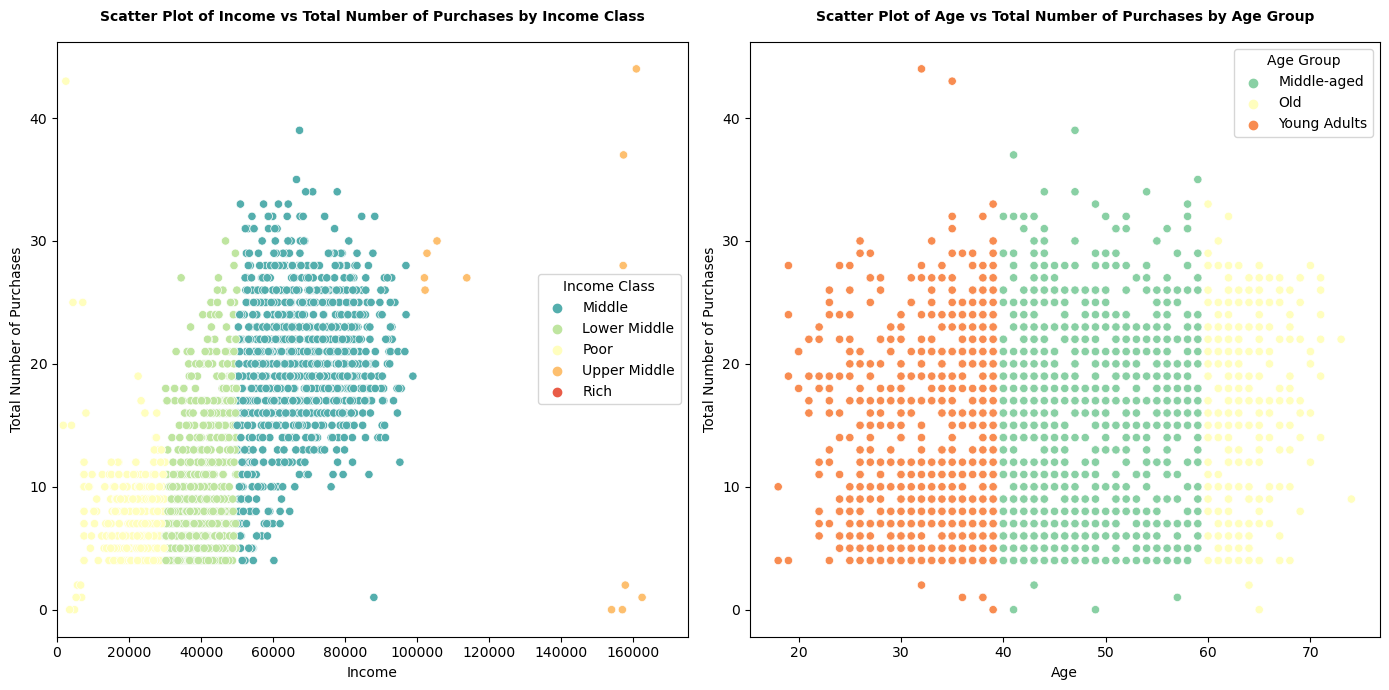

In [31]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)  # (rows, columns, panel number)
sns.scatterplot(x="Income", y='T_NPurchase', hue='IncomeClass', data=df_copy, palette='Spectral_r')
plt.title("Scatter Plot of Income vs Total Number of Purchases by Income Class", 
          fontsize=10, fontweight='bold', pad=15)
plt.xlabel('Income')
plt.ylabel('Total Number of Purchases')
plt.legend(title='Income Class')
plt.xlim(0, 175000)

plt.subplot(1, 2, 2)  # (rows, columns, panel number)
sns.scatterplot(x="Age", y='T_NPurchase', hue='Age_Group', data=df_copy, palette='Spectral_r')
plt.title("Scatter Plot of Age vs Total Number of Purchases by Age Group", 
          fontsize=10, fontweight='bold', pad=15)
plt.xlabel('Age')
plt.ylabel('Total Number of Purchases')
plt.legend(title='Age Group')

plt.tight_layout()  # Adjusts the plots to ensure they fit without overlapping
plt.show()

1. **Pendapatan vs Jumlah Total Pembelian**

- Kelompok Berpenghasilan Rendah: Individu dari kelompok berpendapatan rendah, khususnya kelas 'Miskin' dan 'Menengah Bawah', umumnya menunjukkan jumlah total pembelian yang lebih rendah.
- Kelompok Berpenghasilan Menengah ke Atas: Ketika tingkat pendapatan meningkat (kelas Menengah ke Atas), tampaknya terdapat distribusi yang lebih luas dalam jumlah total pembelian, dengan beberapa individu melakukan jumlah pembelian yang lebih tinggi.
- Tidak Ada Korelasi yang Jelas: Tidak ada korelasi yang jelas dan kuat antara pendapatan dan jumlah total pembelian, karena titik data tersebar luas di berbagai tingkat pendapatan.

2. **Usia vs Jumlah Total Pembelian**

- Individu yang Lebih Muda: Individu yang lebih muda (Dewasa Muda) tampaknya memiliki jumlah total pembelian yang bervariasi, tanpa adanya tren yang jelas yang menunjukkan apakah usia mempengaruhi perilaku pembelian secara signifikan.
- Individu Paruh Baya hingga Lansia: Individu paruh baya memiliki penyebaran jumlah total pembelian yang lebih luas, yang menunjukkan lebih banyak variabilitas dalam perilaku pembelian pada kelompok usia ini. Kelompok usia lanjut tidak menunjukkan tren yang jelas namun agak tersebar.
- Tidak Ada Tren Kuat: Mirip dengan plot pendapatan, tidak ada tren kuat yang dapat diamati antara usia dan jumlah total pembelian.

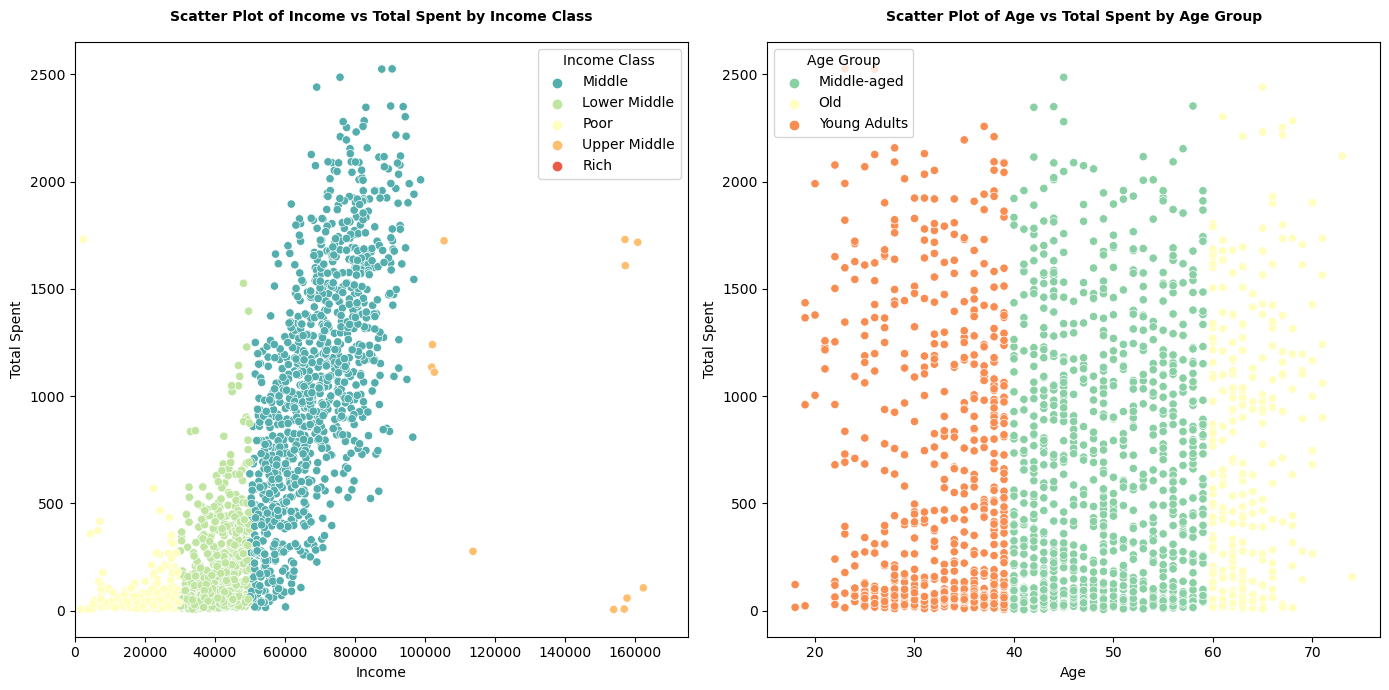

In [32]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)  # (rows, columns, panel number)
sns.scatterplot(x="Income", y='T_AmountSpent', hue='IncomeClass', data=df_copy, palette='Spectral_r')
plt.title("Scatter Plot of Income vs Total Spent by Income Class", 
          fontsize=10, fontweight='bold', pad=15)
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.legend(title='Income Class')
plt.xlim(0, 175000)

plt.subplot(1, 2, 2)  # (rows, columns, panel number)
sns.scatterplot(x="Age", y='T_AmountSpent', hue='Age_Group', data=df_copy, palette='Spectral_r')
plt.title("Scatter Plot of Age vs Total Spent by Age Group", 
          fontsize=10, fontweight='bold', pad=15)
plt.xlabel('Age')
plt.ylabel('Total Spent')
plt.legend(title='Age Group')

plt.tight_layout()  # Adjusts the plots to ensure they fit without overlapping


1. **Pendapatan vs Jumlah Total yang Dibelanjakan**

- **Kelompok Berpenghasilan Rendah**: Individu dalam kelompok berpendapatan 'Miskin' dan 'Menengah Bawah' cenderung membelanjakan lebih sedikit secara keseluruhan, seperti yang diperkirakan karena terbatasnya sumber daya keuangan mereka.
Kelompok Berpenghasilan Menengah ke Atas: Masyarakat dalam kelas pendapatan 'Menengah' dan 'Menengah Atas' menunjukkan jumlah total pengeluaran yang lebih luas, dan beberapa individu melakukan pengeluaran yang cukup signifikan.
- **Korelasi**: Tampaknya ada tren umum di mana pendapatan yang lebih tinggi dikaitkan dengan total pengeluaran yang lebih tinggi, namun terdapat juga banyak pengecualian dan titik data yang tersebar luas.

2. **Usia vs Jumlah Total yang Dibelanjakan**

- **Individu Muda**: Orang Dewasa Muda memiliki beragam perilaku belanja, ada yang membelanjakan sangat sedikit dan ada yang membelanjakan cukup banyak.
- **Individu Paruh Baya hingga Lanjut Usia**: Kelompok usia paruh baya juga menunjukkan penyebaran belanja yang luas, sedangkan kelompok usia yang lebih tua tampaknya memiliki perilaku belanja yang lebih terkelompok dengan jumlah pembelanja tinggi yang lebih sedikit.
- **Tren:** Tidak ada tren yang kuat dan konsisten yang menunjukkan bahwa usia merupakan faktor penentu total pengeluaran, karena terdapat cukup banyak variabilitas di semua kelompok umur.

### **Potential Products**

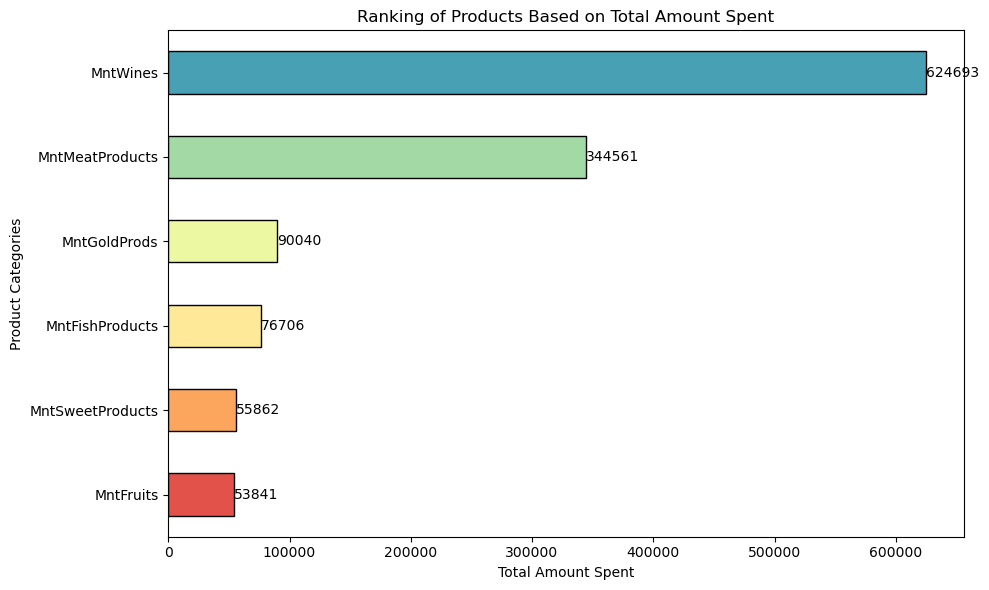

In [33]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_amount_spent = df_copy[product_columns].sum()

product_ranking = total_amount_spent.sort_values(ascending=False)

colors = sns.color_palette("Spectral", len(product_ranking))

plt.figure(figsize=(10, 6))
ax = product_ranking.sort_values().plot(kind='barh', color=colors, edgecolor='black')

plt.ylabel('Product Categories')
plt.xlabel('Total Amount Spent')
plt.title('Ranking of Products Based on Total Amount Spent')

# Adding annotations at the end of each bar
for i in ax.patches:
    ax.text(i.get_width(), i.get_y() + i.get_height()/2, 
            f'{int(i.get_width())}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()


1. **Dominasi Anggur**

    - Anggur tampaknya menjadi kategori produk paling populer, dengan jumlah total pembelanjaan tertinggi. Hal ini menandakan bahwa wine merupakan penyumbang pendapatan perusahaan yang signifikan dan sangat disukai pelanggan.

2. **Produk Daging**

    - Produk daging menempati urutan kedua dalam total belanja, hal ini menunjukkan bahwa produk daging juga merupakan bagian penting dari portofolio produk, dan sesuai dengan preferensi pelanggan.

3. **Buah-buahan, Ikan, Permen, dan Produk Emas**

    - Buah-buahan, produk ikan, produk manisan, dan produk emas memiliki total pengeluaran yang lebih rendah, dengan buah-buahan dan produk ikan menjadi cukup populer.
    - Produk manisan dan produk emas memiliki total pembelanjaan terendah, yang menunjukkan berkurangnya minat pelanggan atau volume penjualan yang lebih rendah pada kategori ini.

4. **Variabilitas Pengeluaran**

    - Terdapat variabilitas yang signifikan dalam pembelanjaan di berbagai kategori produk, dengan produk anggur dan daging mendominasi pembelanjaan pelanggan.

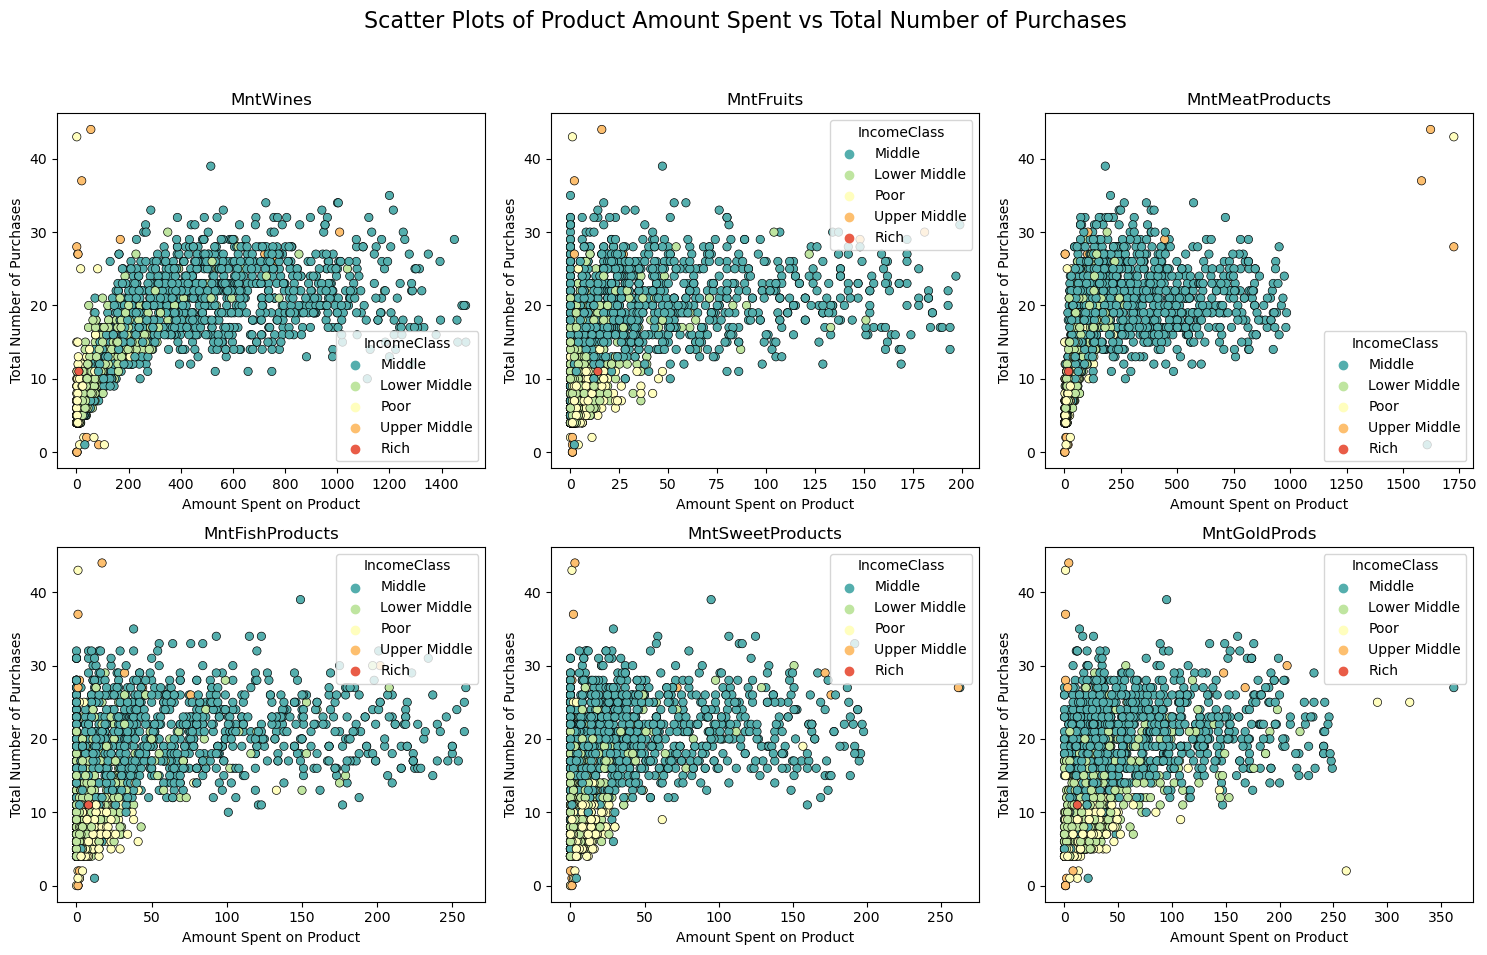

In [34]:

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Scatter Plots of Product Amount Spent vs Total Number of Purchases', fontsize=16)
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

axs = axs.ravel()

for i, column in enumerate(product_columns):
    sns.scatterplot(data=df_copy, x=column, y='T_NPurchase', ax=axs[i], hue='IncomeClass', palette='Spectral_r', edgecolor='black')
    axs[i].set_title(column)
    axs[i].set_xlabel('Amount Spent on Product')
    axs[i].set_ylabel('Total Number of Purchases')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusting the layout to make sure everything fits without overlapping
plt.show()

1. **Potensi Produk: Anggur dan Produk Daging**

    - **Anggur:** Mendominasi total pengeluaran, anggur menunjukkan korelasi yang bervariasi dengan jumlah total pembelian di berbagai kelas pendapatan. Tampaknya ini merupakan kategori yang ampuh di mana upaya pemasaran dapat dioptimalkan untuk menghasilkan pendapatan yang lebih tinggi.
    - **Produk Daging:** Selain memiliki total pembelanjaan yang tinggi, produk daging juga memiliki penyebaran yang cukup beragam, yang menunjukkan minat yang seimbang di berbagai segmen pelanggan.

2. **Berkinerja Sedang:** Buah-buahan dan Produk Ikan

    - **Buah-buahan dan Produk Ikan:** Kategori ini menunjukkan kinerja moderat dalam total belanja. Secara scatter plot, produk-produk tersebut mempunyai sebaran yang relatif tersebar sehingga menunjukkan adanya ruang optimalisasi dalam menyasar berbagai segmen pelanggan.

3. **Ruang untuk Peningkatan: Produk Manis dan Emas**

    - **Produk Manis dan Emas:** Kategori ini memiliki total pengeluaran yang lebih rendah dan juga menunjukkan korelasi yang kurang signifikan dalam plot sebar. Hal ini menunjukkan adanya potensi dimana strategi pemasaran dapat ditinjau kembali dan dioptimalkan.

4. **Diferensiasi Kelas Pendapatan**

    Kelas pendapatan yang berbeda menunjukkan perilaku pembelanjaan yang bervariasi di seluruh produk, yang dapat digunakan untuk menyesuaikan strategi pemasaran yang spesifik untuk segmen pelanggan.

### **Potential Channel**

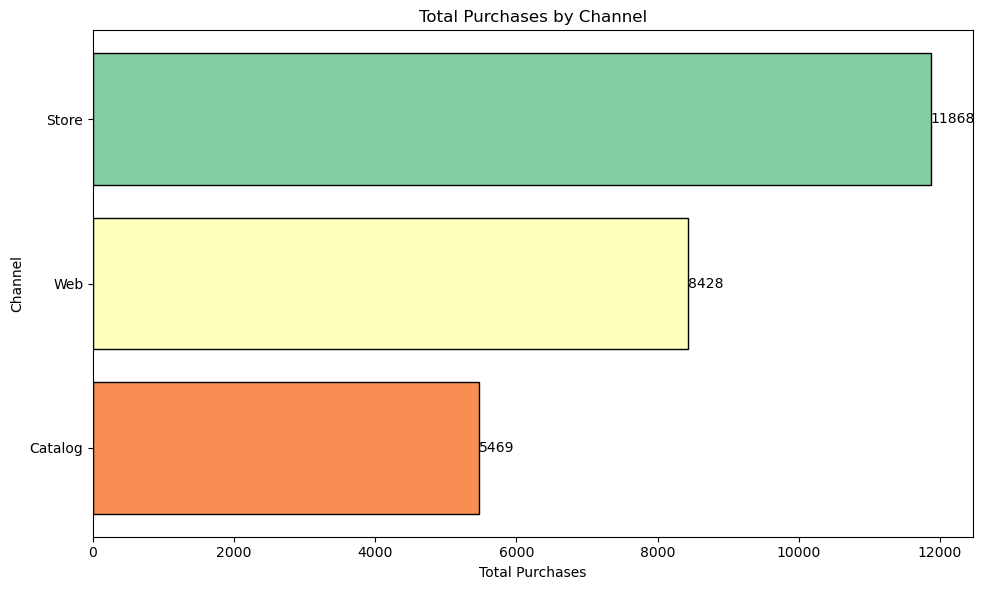

In [35]:
channels_df = pd.DataFrame({
    'Channel': ['Web', 'Catalog', 'Store'],
    'Total_Purchases': [
        df_copy['NumWebPurchases'].sum(),
        df_copy['NumCatalogPurchases'].sum(),
        df_copy['NumStorePurchases'].sum()
    ]
})

# Sorting the DataFrame by Total_Purchases in descending order
channels_df.sort_values(by='Total_Purchases', ascending=True, inplace=True)
colors = sns.color_palette("Spectral", len(channels_df))

# Creating the bar plot
plt.figure(figsize=(10, 6))
ax = plt.barh(channels_df['Channel'], channels_df['Total_Purchases'], color=colors, edgecolor='black')

plt.title('Total Purchases by Channel')
plt.xlabel('Total Purchases')
plt.ylabel('Channel')

# Adding annotations to each bar
for i in ax.patches:
    plt.text(i.get_width(), i.get_y() + i.get_height()/2, 
             f'{int(i.get_width())}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()


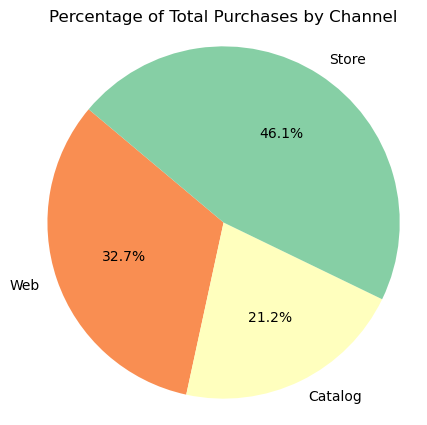

In [36]:
channels_df = pd.DataFrame({
    'Channel': ['Web', 'Catalog', 'Store'],
    'Total_Purchases': [
        df_copy['NumWebPurchases'].sum(),
        df_copy['NumCatalogPurchases'].sum(),
        df_copy['NumStorePurchases'].sum()
    ]
})

# Creating the pie chart
plt.figure(figsize=(5, 5))
plt.pie(channels_df['Total_Purchases'], labels=channels_df['Channel'], autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("Spectral", len(channels_df)))
plt.title('Percentage of Total Purchases by Channel')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


1. **Dominasi Pembelian Toko**

    Pembelian di toko mendominasi, menyumbang jumlah total pembelian tertinggi. Hal ini menunjukkan bahwa toko fisik saat ini merupakan saluran penjualan yang paling efektif.

2. **Saluran Web dan Katalog**

    Saluran Web dan Katalog juga memiliki porsi yang signifikan dari total pembelian, sehingga menunjukkan relevansi dan efektivitasnya dalam perjalanan pembelian pelanggan.

### **Exploring the right time to do campaign**

Salah satu aspek yang dapat dijajaki adalah mengidentifikasi waktu yang paling potensial untuk melakukan kampanye. Dari data tersebut kita dapat menentukan hari dan bulan anggota terbanyak yang bergabung. Wawasan ini dapat berperan penting dalam perencanaan dan mengoptimalkan waktu kampanye di masa depan untuk memaksimalkan keterlibatan dan partisipasi.

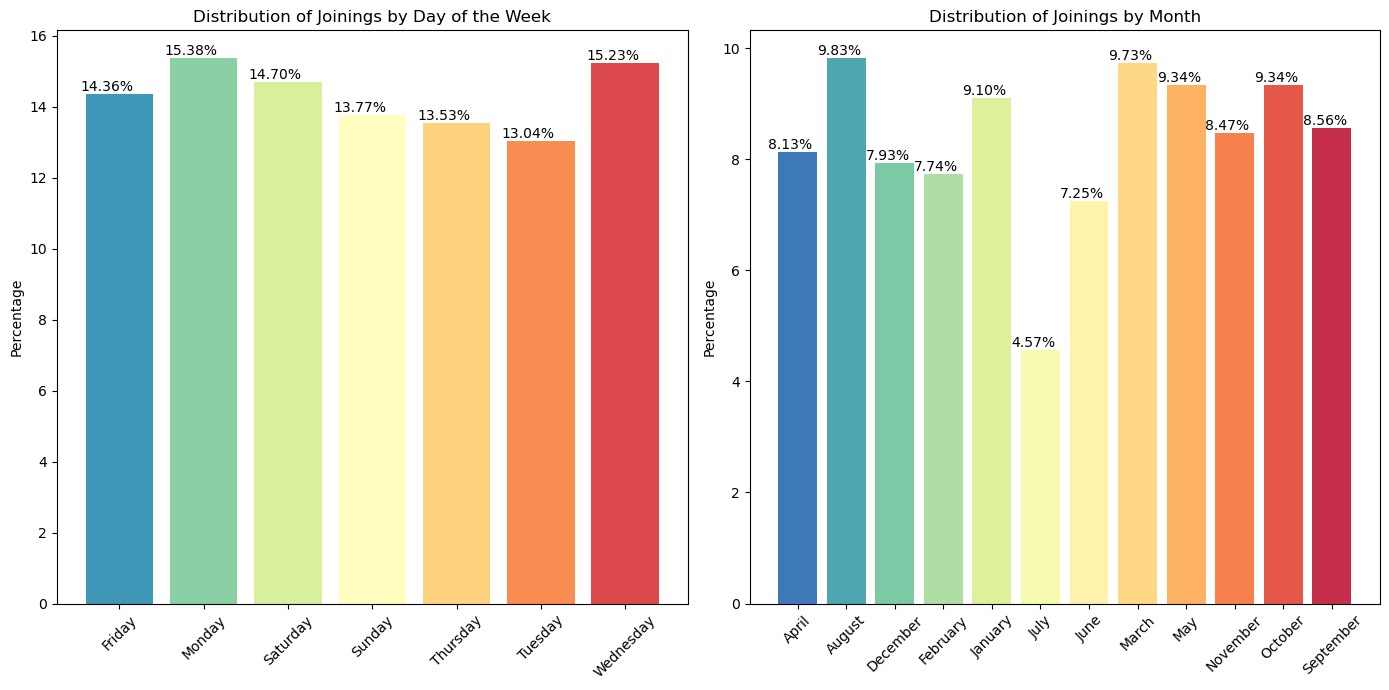

In [38]:
day_counts = df_copy['Day_Joined'].value_counts(normalize=True) * 100
month_counts = df_copy['Month_Joined'].value_counts(normalize=True) * 100

day_counts.sort_index(inplace=True)
month_counts.sort_index(inplace=True)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

bars1 = axs[0].bar(day_counts.index, day_counts.values, color=sns.color_palette("Spectral_r", len(day_counts)))
axs[0].set_title('Distribution of Joinings by Day of the Week')
axs[0].set_ylabel('Percentage')
axs[0].set_xticklabels(day_counts.index, rotation=45)

for bar in bars1:
    axs[0].text(bar.get_x() + bar.get_width() / 2 - 0.15, 
                bar.get_height(), 
                f'{bar.get_height():.2f}%', 
                va='bottom', 
                ha='center', 
                fontsize=10)

bars2 = axs[1].bar(month_counts.index, month_counts.values, color=sns.color_palette("Spectral_r", len(month_counts)))
axs[1].set_title('Distribution of Joinings by Month')
axs[1].set_ylabel('Percentage')
axs[1].set_xticklabels(month_counts.index, rotation=45)

for bar in bars2:
    axs[1].text(bar.get_x() + bar.get_width() / 2 - 0.15, 
                bar.get_height(), 
                f'{bar.get_height():.2f}%', 
                va='bottom', 
                ha='center', 
                fontsize=10)

plt.tight_layout()
plt.show()


Diagram lingkaran menunjukkan distribusi keanggotaan yang bervariasi pada bulan yang berbeda. Tidak ada satu bulan pun yang mendominasi dalam hal jumlah anggota baru. Bulan-bulan tertentu menunjukkan tingkat keanggotaan yang sedikit lebih tinggi. Hal ini dapat dipengaruhi oleh tren musiman atau aktivitas pemasaran tertentu yang mungkin membuat bergabung menjadi lebih menarik pada saat-saat tersebut.

Dampak positifnya bagi dunia usaha adalah:
1. **Bunga keanggotaan tetap:** 
Pola distribusi yang konsisten terlihat sepanjang hari dalam seminggu, yang menandakan tingkat minat dan keterlibatan yang berkelanjutan dalam bergabung, tanpa variasi atau perbedaan yang mencolok.

2. **Tren bergabung tanpa bergantung pada hari:** 
Analisis tersebut menunjukkan bahwa tidak ada hari tertentu yang secara signifikan mengungguli hari lainnya dalam hal keanggotaan baru. Hal ini menunjukkan kurangnya ketergantungan pada hari-hari tertentu, sehingga menggambarkan daya tarik dan aksesibilitas keanggotaan yang lebih universal sepanjang minggu.

---------------------------------------------------
## **Conclusion**

1. Seberapa efektifkah kampanye sebelumnya dalam menarik pelanggan dan meningkatkan penjualan?

    - Mayoritas konsumen belum menerima kampanye sebelumnya; hanya 20,9% yang sudah menerimanya, sedangkan 79,1% belum menerimanya.
    - Sebagian besar kampanye yang diterima konsumen terbukti efektif dalam meningkatkan penjualan. 
    - Kampanye 1, 2, 4, dan 5 efektif meningkatkan penjualan, sedangkan hanya kampanye 3 yang tidak.

2. Wawasan apa yang dapat kita peroleh mengenai perilaku pembelian pelanggan berdasarkan informasi demografis mereka?

   - Mayoritas pelanggan IndoMarket memiliki latar belakang pendidikan jenjang sarjana (50,1%) dan pascasarjana (47,5%). Sebagian besar nasabah sebagian besar berasal dari kelas menengah (51,6%) dan menengah ke bawah (31,3%), kelompok usia menengah (51,1%), dan memiliki jumlah anggota keluarga satu atau dua orang (39,1%).
   
   - Profil konsumen berdasarkan frekuensi pembelian:
     - Kategori Usia: Kelompok usia 'Tua' memiliki jumlah pengeluaran tertinggi, diikuti oleh 'Paruh Baya' dan 'Dewasa Muda'.
     - Ukuran Keluarga: Pelanggan dengan satu keluarga memiliki jumlah pembelanjaan tertinggi.
     - Kelas Pendapatan: Kelas “Menengah Atas” mendominasi baik dari segi frekuensi pembelian maupun volume transaksi.
     - Tingkat Pendidikan: Pelanggan dengan latar belakang pendidikan sarjana dan pascasarjana memiliki frekuensi pembelanjaan dan pembelian tertinggi.

   - Kampanye memiliki korelasi yang kuat dengan frekuensi transaksi dan jumlah pembelanjaan, terutama kampanye 1, 2, 4, dan 5.
   
   - Kampanye memiliki korelasi yang kuat dengan penjualan secara keseluruhan, dengan peningkatan signifikan pada produk tertentu dalam kampanye tertentu.

3. Area potensial apa yang dapat dikembangkan atau ditingkatkan untuk meningkatkan kampanye dan penjualan di masa depan?
   - Produk terpopuler adalah Wine dan Daging yang menjadi kontributor terbesar penawaran produk IndoMarket.
   - Saluran pembelian yang paling umum adalah di dalam toko.
   - Kunjungan konsumen ke IndoMarket relatif stabil setiap harinya.


    

---------------------------------------------------
## **Recommendation**

1. Memfokuskan kampanye pada peningkatan jumlah penerima kampanye di kalangan konsumen, dengan tetap mempertimbangkan calon pelanggan.
2. Soroti Anggur dan Daging sebagai produk unggulan dalam kampanye untuk mendorong penjualan.
3. Diversifikasi kampanye produk untuk meningkatkan penjualan produk lainnya